In [1]:
import sys
import os


sys.path.append("../..")


from settings import np, plt, pi, hplanck
from projects.double_well_potentials.doublewells import DW, SL
from lattice.opticallattice import EllipticalGaussianBeam, power2freq

import pprint
import matplotlib as mpl

mpl.rcParams["axes.grid"] = True
mpl.rcParams["lines.marker"] = ""
mpl.rcParams["legend.framealpha"] = 0.75


Erl = 1710
Ers = 6840


%load_ext autoreload
%autoreload 2

# A Super Lattice instance

c:\Users\janet\ownCloud - Janet Qesja (jqesja)@datashare.mpcdf.mpg.de\phd_code\fermiqp_physics\fermiqp-physics\lattice\opticallattice.py:527: UserWarning: E-field calculation doesn't account for power
  warnings.warn("E-field calculation doesn't account for power")


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='y / um', ylabel='U / $Er_s$'>)

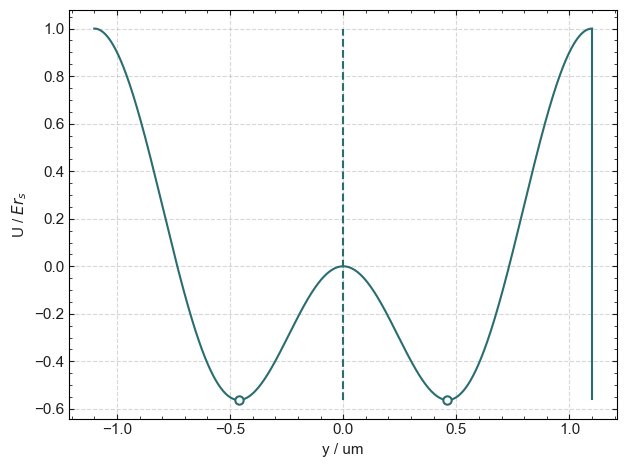

In [2]:
Erl = 1710
Ers = 6840

# Vl = 1 * Ers /4
Vl = 1 * Ers / 4
Vs = 1 * Ers / 4


green_waist = 120e-6
ir_waist = 120e-6

phi_long = 0
phi_short = 0

SL_params = {
    "Vs": Vs,
    "Vl": Vl,
    "green_waist": green_waist,
    "ir_waist": ir_waist,
    "phi_s": phi_short,
    "phi_l": phi_long,
}


SL1 = SL(**SL_params)

SL1.dws["0"].plotDW()

Can get the two potentials, separately

Text(0, 0.5, 'U / $E_r^ss$')

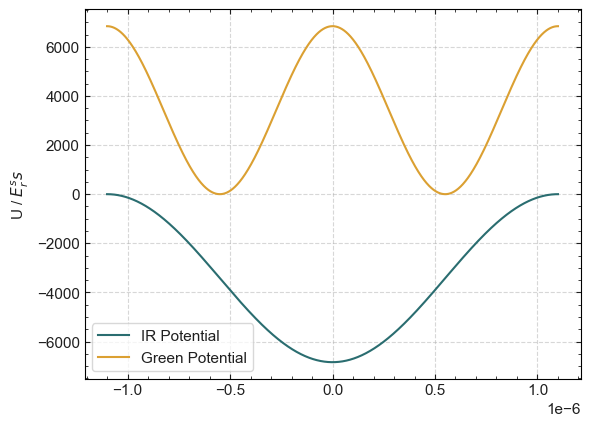

In [3]:
center = DW(SL1, 0)
plt.plot(center.y, SL1.ir_lattice.getPotential(center._pos), label="IR Potential")
plt.plot(
    center.y,
    SL1.green_lattice.getPotential(center._pos),
    label="Green Potential",
)
plt.legend()
plt.ylabel("U / $E_r^ss$")

### Change dict params

The dictionary collecting the lattice parameters can be updated, to iterate over a parameter:


In [4]:
param_dict = {
    "Vs": Vs,
    "Vl": Vl,
    "green_waist": green_waist,
    "ir_waist": ir_waist,
    "phi_s": 0,
    "phi_l": 0,
}

Phase shifting the electrical field of one green beam

c:\Users\janet\ownCloud - Janet Qesja (jqesja)@datashare.mpcdf.mpg.de\phd_code\fermiqp_physics\fermiqp-physics\projects\double_well_potentials\../..\projects\double_well_potentials\doublewells.py:302: UserWarning: 
Lattice is shifted
  warnings.warn("\nLattice is shifted")


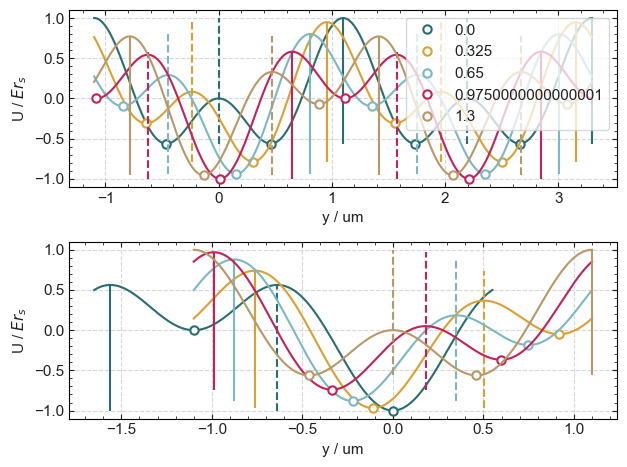

In [5]:
plt.subplot(211)
for phs in np.linspace(0, 1.3, 5, endpoint=True)[:] * pi:
    # define a center DW
    # and update one value of the dict NOT in place
    center = DW(SL(**(param_dict | {"phi_s": phs})), index=0)
    center.plotDW()

    # define the first DW
    first = DW(SL(**(param_dict | {"phi_s": phs})), index=1)
    first.plotDW(showextrema=True, **{"color": plt.gca().lines[-1].get_color()})

    plt.gca().lines[-1].set_label(phs / pi)


plt.legend()
plt.subplot(212)
for phs in np.linspace(1, 2, 5) * pi:
    center = DW(SL(**(param_dict | {"phi_s": phs})), index=0)
    center.plotDW()
    plt.gca().lines[-1].set_label(phs / pi)

Phase shifting the **Electric field**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


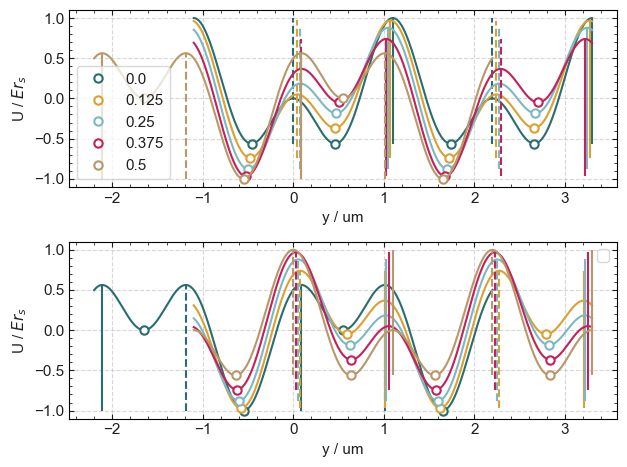

In [6]:
inter = []
intra = []


plt.subplot(211)
for phl in np.linspace(0, 1 / 2, 5) * pi:
    center = DW(SL(**(param_dict | {"phi_l": phl})), index=0)
    center.plotDW(showextrema=True)

    first = DW(SL(**(param_dict | {"phi_l": phl})), index=1)
    first.plotDW(showextrema=True, **{"color": plt.gca().lines[-1].get_color()})
    plt.gca().lines[-1].set_label(phl / pi)

plt.legend()


plt.subplot(212)
for phl in np.linspace(1 / 2, 1, 5) * pi:
    center = DW(SL(**(param_dict | {"phi_l": phl})), index=0)
    center.plotDW(showextrema=True)
    first = DW(SL(**(param_dict | {"phi_l": phl})), index=1)
    first.plotDW(showextrema=True, **{"color": plt.gca().lines[-1].get_color()})
plt.legend()

inter = np.array(inter)
intra = np.array(intra)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='y / um', ylabel='U / $Er_s$'>)

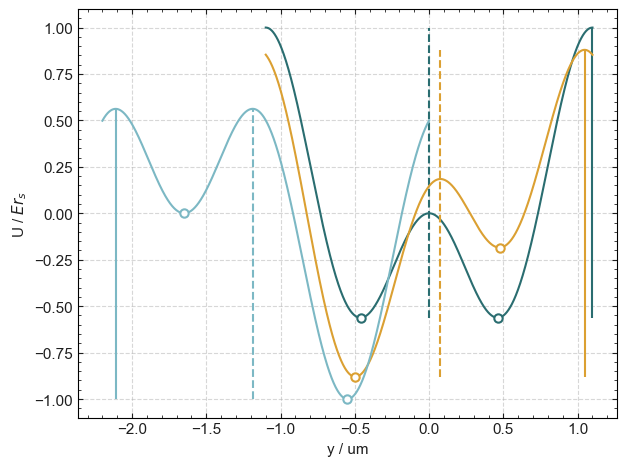

In [7]:
center = DW(SL(**(param_dict | {"phi_l": pi * 0, "phi_s": 0})), index=0)
center.plotDW()
center = DW(SL(**(param_dict | {"phi_l": pi / 4, "phi_s": 0})), index=0)
center.plotDW()
center = DW(SL(**(param_dict | {"phi_l": pi / 2, "phi_s": 0})), index=0)
center.plotDW()

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='y / um', ylabel='U / $Er_s$'>)

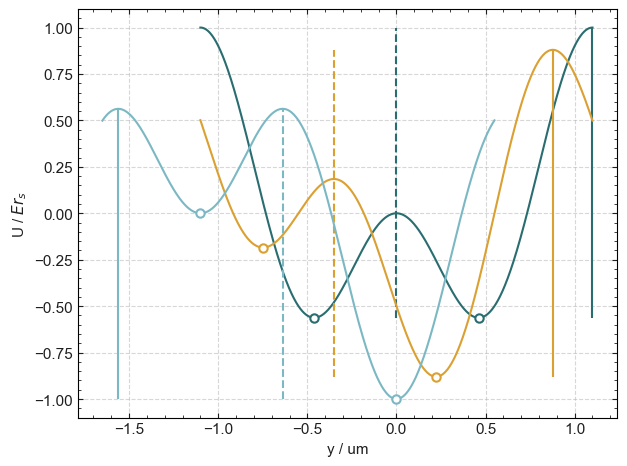

In [8]:
center = DW(SL(**(param_dict | {"phi_l": 0, "phi_s": pi * 0})), index=0)
center.plotDW()
center = DW(SL(**(param_dict | {"phi_l": 0, "phi_s": pi / 2})), index=0)
center.plotDW()
center = DW(SL(**(param_dict | {"phi_l": 0, "phi_s": pi / 1})), index=0)
center.plotDW()

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='y / um', ylabel='U / $Er_s$'>)

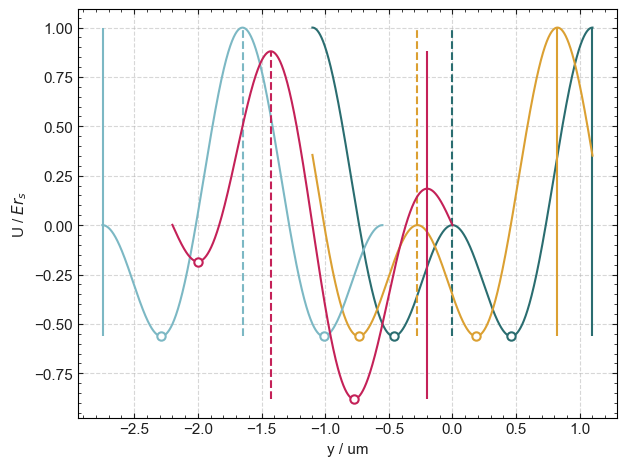

In [9]:
center = DW(SL(**(param_dict | {"phi_l": pi * 0, "phi_s": pi * 0})), index=0)
center.plotDW()
center = DW(SL(**(param_dict | {"phi_l": pi / 4, "phi_s": pi / 2})), index=0)
center.plotDW()
center = DW(SL(**(param_dict | {"phi_l": pi / 2, "phi_s": pi})), index=0)
center.plotDW()
center = DW(SL(**(param_dict | {"phi_l": pi / 2, "phi_s": pi / 2})), index=0)
center.plotDW()

**NOTE**:


  * `dw.interwell` refers to the value of the maximum potential between the two minima 
  * `dw.interbarrier` is the **DIFFERENCE** between the interwell barrier the the minima 

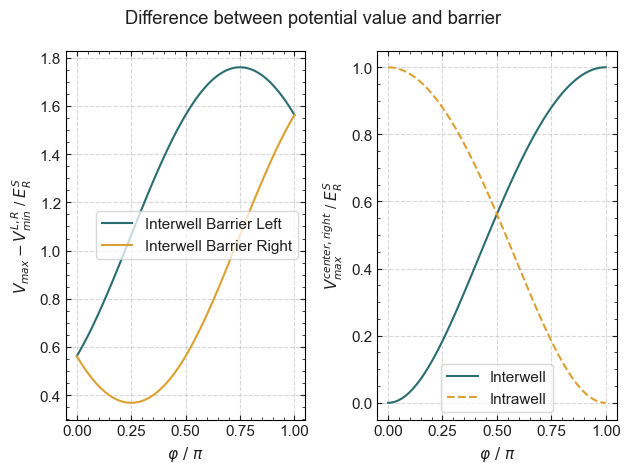

In [10]:
inter = []
intra = []


interbarrier = []
intrabarrier = []

for phl in np.linspace(0, 1, 100) * pi:
    center = DW(SL(**(param_dict | {"phi_l": phl})), index=0)
    maxima = center.getMaxima()
    interbarrier.append(center.interbarrier)
    intrabarrier.append(center.intrabarrier)
    inter.append(center.interwell)
    intra.append(center.intrawell)

interbarrier = np.array(interbarrier)
intrabarrier = np.array(intrabarrier)
inter = np.array(inter)
intra = np.array(intra)

plt.subplot(
    121,
)
plt.plot(
    np.linspace(0, 1, 100),
    interbarrier,
    linestyle="-",
    label=["Interwell Barrier Left", "Interwell Barrier Right"],
)

plt.ylabel("$V_{max}-V_{min}^{L,R}$ / $E_R^S$")

plt.xlabel("$\\varphi \\ / \\ \\pi$")
plt.legend()


plt.subplot(122)
plt.plot(
    np.linspace(0, 1, 100),
    inter,
    linestyle="-",
    label="Interwell",
)
plt.plot(
    np.linspace(0, 1, 100),
    intra,
    linestyle="--",
    label="Intrawell",
)
plt.xlabel("$\\varphi \\ / \\ \\pi$")
plt.ylabel("$V_{max}^{center, right}$ / $E_R^S$")
plt.legend()

plt.suptitle("Difference between potential value and barrier")
plt.tight_layout()

## Adding double wells to a SL instance

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='y / um', ylabel='U / $Er_s$'>)

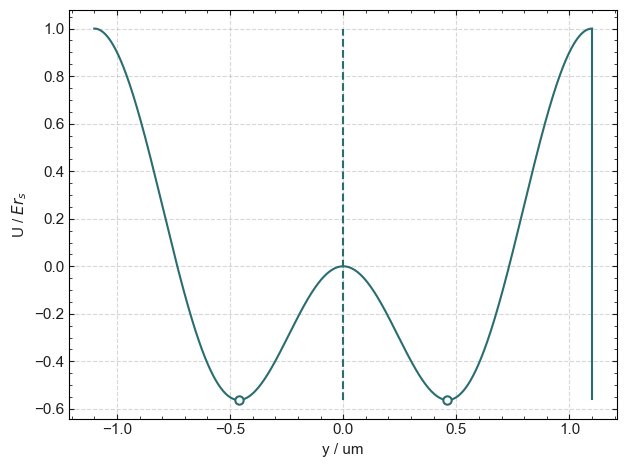

In [11]:
Erl = 1710
Ers = 6840

# Vl = 1 * Ers /4
Vl = 1 * Ers / 4
Vs = 1 * Ers / 4


green_waist = 120e-6
ir_waist = 120e-6

phi_long = 0
phi_short = 0

SL_params = {
    "Vs": Vs,
    "Vl": Vl,
    "green_waist": green_waist,
    "ir_waist": ir_waist,
    "phi_s": phi_short,
    "phi_l": phi_long,
}


SL1 = SL(**SL_params)

SL1.dws["0"].plotDW()

can add a DW to the Lattice

In [12]:
SL1.addDW([33, -2])

In [13]:
SL1.dwindices

[-2, 0, 33]

In [14]:
SL1.dws

{'-2': <projects.double_well_potentials.doublewells.DW at 0x232feb83740>,
 '0': <projects.double_well_potentials.doublewells.DW at 0x232febcf530>,
 '33': <projects.double_well_potentials.doublewells.DW at 0x232ffda4560>}

## DW attributes

In [15]:
print("Imbalances in the Superlattice:", SL1.getProp("imbalance"), "Ers")
print("position of the mininma in the Superlattice:", SL1.getProp("min_pos"), "m")
print(
    "values of the mininma in the Superlattice:",
    SL1.getProp("min_pot"),
    "Ers",
)

Imbalances in the Superlattice: [ 5.60212625e-04  1.11022302e-16 -4.64956526e-03] Ers
position of the mininma in the Superlattice: [[-4.85980e-06 -3.93690e-06]
 [-4.60900e-07  4.60900e-07]
 [ 7.21072e-05  7.30301e-05]] m
values of the mininma in the Superlattice: [[-0.56078461 -0.56134482]
 [-0.56248487 -0.56248487]
 [-0.28485567 -0.28020611]] Ers


Can define a different instance of the SL with the same params but at different x

In [16]:
SL22 = SL([-2, 0, 33], x=300e-6, z=0, **SL_params)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='y / um', ylabel='U / $Er_s$'>)

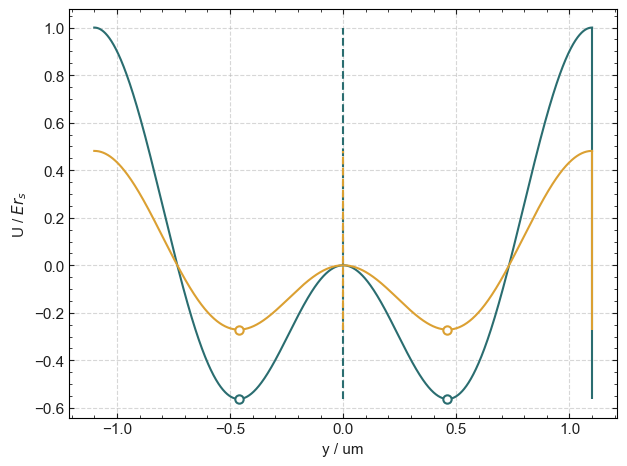

In [17]:
SL1.dws["0"].plotDW()
SL22.dws["0"].plotDW()

# Double Well instances

Can define specific Double wells on a SL instance

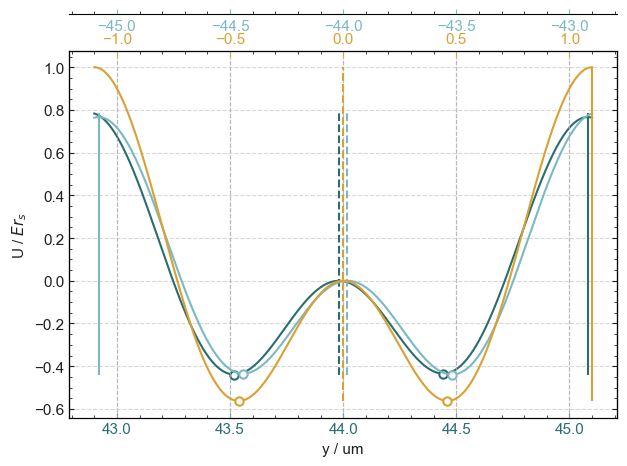

In [18]:
center = DW(SL1, 0)
edgeright = DW(SL1, 20)
edgeleft = DW(SL1, -20)

edgeright.plotDW(sharexaxis=False)
plt.gca().spines["top"].set_color(plt.gca().lines[-1].get_color())
plt.gca().tick_params(axis="x", colors=plt.gca().lines[-1].get_color())
plt.tight_layout()
plt.twiny()
edgeleft.plotDW(sharexaxis=False, color="C2")
plt.gca().tick_params(axis="x", colors=plt.gca().lines[-1].get_color())
plt.gca().spines["bottom"].set_position(("axes", 1.1))
plt.xlabel("")
plt.tight_layout()
plt.twiny()
center.plotDW(color="C1")
plt.gcf().tight_layout()
plt.gca().tick_params(axis="x", colors=plt.gca().lines[-1].get_color())
plt.xlabel("")
plt.tight_layout()

In [19]:
first = DW(SL(**(SL_params | {"phi_l": pi / 2})), 1)
center = DW(SL(**(SL_params | {"phi_l": pi / 2})), 0)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='y / um', ylabel='U / $Er_s$'>)

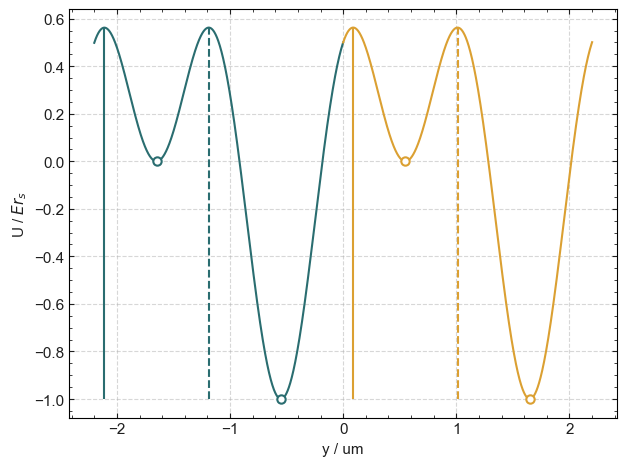

In [20]:
center.plotDW()
first.plotDW()
# plt.plot(center.interwell_pos/1e-6, center.interwell, "o")
# plt.plot(center.intrawell_pos/1e-6, center.intrawell, "*")

# Example: explore imbalances.

Let's say we want to shift the phase on one green beam's electric field

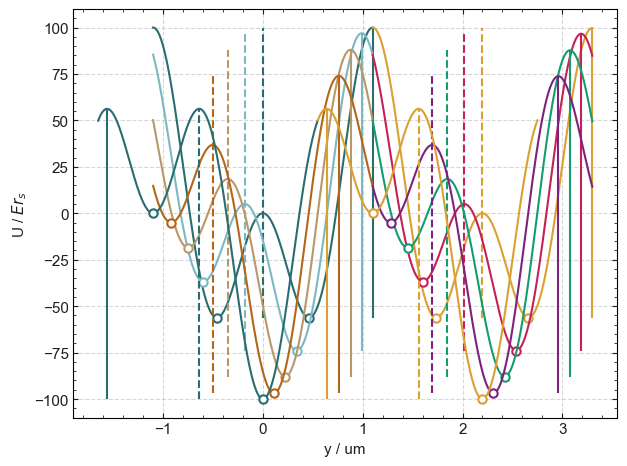

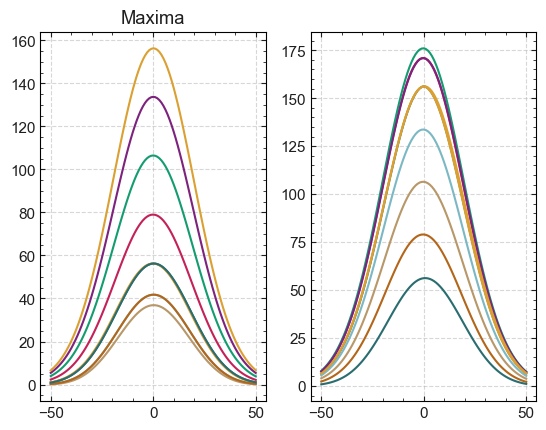

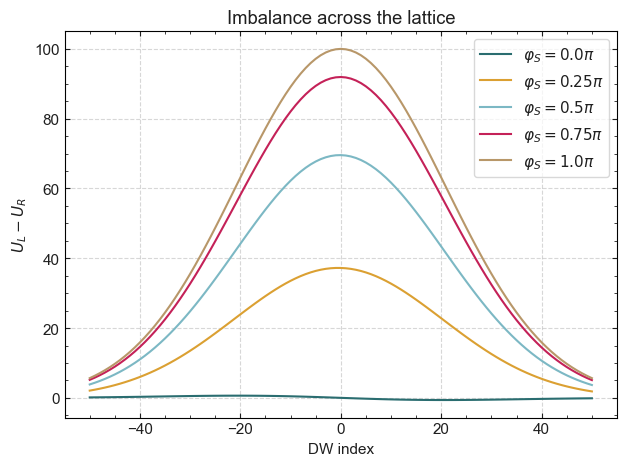

In [21]:
imbalances = []
min_pot = []
min_pos = []


inter = []
intra = []

iter_array = np.linspace(0, 1, 5, endpoint=True) * pi
indices = np.arange(-50, 51)

# VERTICAL WAISTS
irwaist_vert = 66e-6
grwaist_vert = 66e-6


irwaist_hor = 120e-6
grwaists_hor = 100e-6

ir_waist = np.sqrt(irwaist_hor * irwaist_vert)
gr_waist = np.sqrt(grwaists_hor * grwaist_vert)

phi_long = 0

for phis in iter_array[:]:
    phi_short = phis

    SL_params = {
        "Vs": 100 * Ers / 4,  # Vs,
        "Vl": 100 * Ers / 4,  # Vl,
        "green_waist": gr_waist,
        "ir_waist": ir_waist,
        "phi_s": phi_short,
        "phi_l": phi_long,
    }
    SL1 = SL(indices, **SL_params)

    plt.figure("DW")
    c = DW(SL1, 0)
    c1 = DW(SL1, 1)
    c.plotDW(showextrema=True)
    c1.plotDW(showextrema=True)

    imbalances.append(SL1.getProp("imbalance"))
    inter.append(SL1.getProp("interbarrier"))
    intra.append(SL1.getProp("intrabarrier"))
    min_pot.append(SL1.getProp("min_pot"))
    min_pos.append(SL1.getProp("min_pos"))

    plt.figure("imbalance")
    plt.plot(
        indices,
        imbalances[-1],
        marker="",
        label=f"$\\varphi_S  = {phis / pi:.3} \\pi$",
    )
    plt.ylabel("$U_L-U_R$")
    plt.xlabel("DW index")

    plt.figure("barriers")
    plt.subplot(121)
    plt.title("Maxima")
    plt.plot(
        indices,
        inter[-1],
        marker="",
        label=f"$\\varphi_S  = {phis / pi:.3} \\pi$",
    )
    plt.subplot(122)
    plt.plot(
        indices,
        intra[-1],
        marker="",
        label=f"$\\varphi_S  = {phis / pi:.3} \\pi$",
    )


imbalances = np.array(imbalances)
min_pot = np.array(min_pot)
min_pos = np.array(min_pos)


plt.figure("imbalance")
plt.title("Imbalance across the lattice")
plt.tight_layout()
plt.legend()


inter = np.array(inter)
intra = np.array(intra)

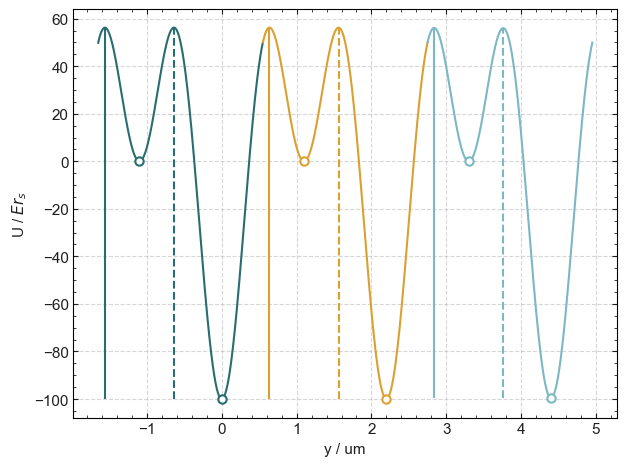

In [22]:
for i in SL1.dwindices[50:53]:
    SL1.dws[f"{i}"].plotDW()

## BUG: missing maxima

Especially for values of $\varphi_S$ close to $\pi$, the code sometimes misses some maxima.

In general, for extreme values of $\varphi_S$, the code will "shift" the location of the DW by 0.55 um (quarter of the size of the DW). This works well for typical size systems we are interested in. However, at the edges of the system, or where the two colors are different, some maxima will be skipped. See below:

In [24]:
SL_params = {
    "Vs": Vs,
    "Vl": Vl,
    "green_waist": green_waist,
    "ir_waist": ir_waist,
    "phi_s": phi_short,
    "phi_l": phi_long,
}


SL_bug = SL(
    **(SL1.latt_params | {"phi_s": iter_array[-1]}),
    dwindices=list(range(-1, 150)),
    # dwindices=list(range(-1, 78)),
    # dwindices=[1, -1, 0, 96, 98, 99, 100],
)

SL_bug.dws["-1"].plotDW()
SL_bug.dws["0"].plotDW()
SL_bug.dws["1"].plotDW()

plt.figure()
i = 92
# i = 57
SL_bug.dws[f"{i+0}"].plotDW()
SL_bug.dws[f"{i+1}"].plotDW()
SL_bug.dws[f"{i+2}"].plotDW()
plt.axvline(
    SL_bug.dws["93"].y[0] / 1e-6,
    color="red",
    linestyle="-",
    label="Missed intrawell",
)
plt.legend()

ValueError: 78: Single minima

This effect is not as pronounced when shifting the IR phase beacause the COM motion of the minima is more stable

## Position and value of the minima

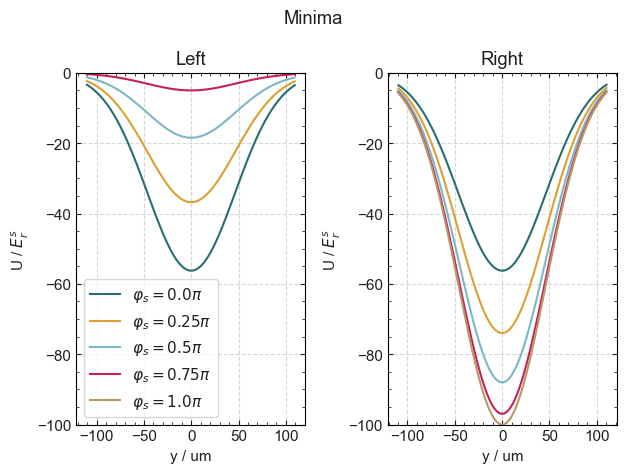

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=2)

for i, ph in enumerate(iter_array):
    axs[0].plot(
        min_pos[i, :, 0] / 1e-6,
        min_pot[i, :, 0],
        label=f"$\\varphi_s = {ph/pi:.3} \\pi$",
    )
    axs[1].plot(
        min_pos[i, :, 1] / 1e-6,
        min_pot[i, :, 1],
        label=f"$\\varphi_s = {ph/pi:.3} \\pi$",
    )

axs[1].set_title("Right")
axs[0].set_title("Left")

for ax in axs:
    ax.set_ylim(-100, 0)
    ax.set_xlabel("y / um")
    ax.set_ylabel("U / $E_r^s$")
axs[0].legend(framealpha=0.8)

fig.suptitle("Minima")
fig.tight_layout()

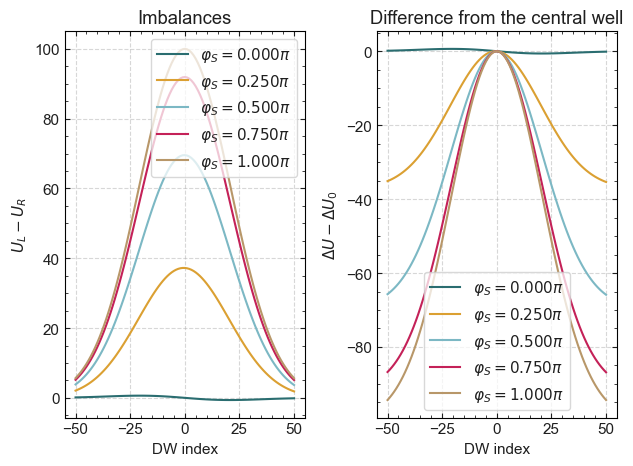

In [27]:
plt.subplot(121)
plt.plot(
    indices,
    imbalances[:, :].T,
    marker="",
    # indices, imbalances[:,:].T, marker="",
)
plt.ylabel("$U_L-U_R$")
plt.xlabel("DW index")
plt.legend(labels=[f"$\\varphi_S  = {i/pi:.3f} \\pi$" for i in iter_array[:]])
plt.title("Imbalances")

plt.subplot(122)
plt.plot(
    indices,
    imbalances[:, :].T - imbalances[:, imbalances.shape[1] // 2],
    marker="",
    # indices, imbalances[:,:].T, marker="",
)
plt.ylabel("$\\Delta U -\\Delta U_0$")
plt.xlabel("DW index")
plt.legend(labels=[f"$\\varphi_S  = {i/pi:.3f} \\pi$" for i in iter_array[:]])
plt.title("Difference from the central well")

plt.tight_layout()

Text(0.5, 1.0, 'Normalized to the maximum')

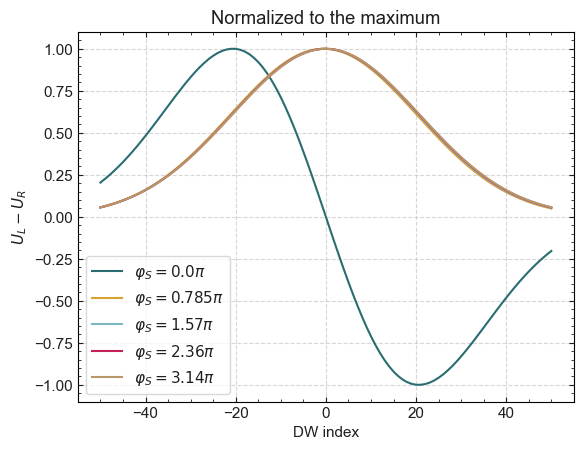

In [28]:
plt.plot(
    indices,
    imbalances[:, :].T / np.abs(imbalances[:].max(axis=1)),
    marker="",
    # indices, imbalances[:,:].T, marker="",
)
plt.ylabel("$U_L-U_R$")
plt.xlabel("DW index")
plt.legend(labels=[f"$\\varphi_S  = {i:.3} \\pi$" for i in iter_array[:]])
plt.title("Normalized to the maximum")

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='y / um', ylabel='U / $Er_s$'>)

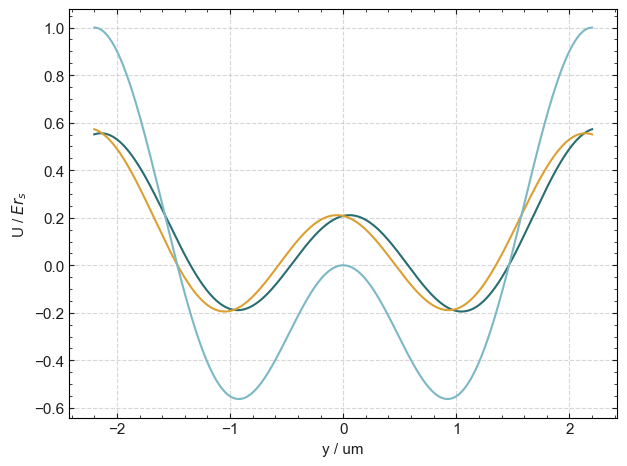

In [29]:
balanced_params = {
    "Vs": Vs,
    "Vl": Vl,
    "green_waist": green_waist,
    "ir_waist": ir_waist,
    "phi_s": 0,
    "phi_l": 0,
}

DW(SL(**balanced_params), index=-30).plotDW(sharexaxis=True)
DW(SL(**balanced_params), index=30).plotDW(sharexaxis=True)
DW(SL(**balanced_params), index=0).plotDW(sharexaxis=True)
# plt.ylim(-0.5, -0.1)

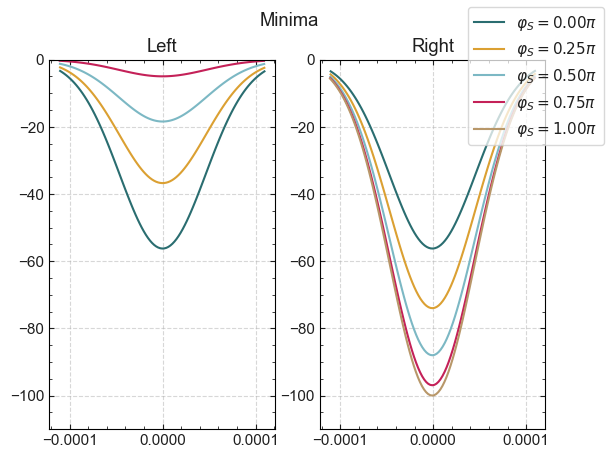

In [30]:
plt.subplot(121)
plt.plot(
    min_pos[:, :, 0].T,
    min_pot[:, :, 0].T,
)
plt.ylim(-110, 0)
plt.title("Left")
plt.subplot(122)
plt.plot(
    min_pos[:, :, 0].T,
    min_pot[:, :, 1].T,
)
plt.ylim(-110, 0)
plt.title("Right")
plt.suptitle("Minima")
plt.gcf().legend([f"$\\varphi_S  = {i/pi:.2f} \\pi$" for i in iter_array[:]])

# Imbalances for different waists

Different combinations of waists:

GREEN: geom waist: 89 um, vert: 80 um,hor: 100 um
	Power per beam = 1.67 W
	Lattice depth = 100.00 Ers

IR: geom waist: 89 um, vert: 80 um, hor: 100 um
	Power per beam = 1.71 W
	Lattice depth = 100.00 Ers

GREEN: geom waist: 89 um, vert: 80 um,hor: 100 um
	Power per beam = 1.67 W
	Lattice depth = 100.00 Ers

IR: geom waist: 89 um, vert: 80 um, hor: 100 um
	Power per beam = 1.71 W
	Lattice depth = 100.00 Ers

GREEN: geom waist: 110 um, vert: 80 um,hor: 150 um
	Power per beam = 2.51 W
	Lattice depth = 100.00 Ers

IR: geom waist: 110 um, vert: 80 um, hor: 150 um
	Power per beam = 2.56 W
	Lattice depth = 100.00 Ers

GREEN: geom waist: 126 um, vert: 80 um,hor: 200 um
	Power per beam = 3.34 W
	Lattice depth = 100.00 Ers

IR: geom waist: 126 um, vert: 80 um, hor: 200 um
	Power per beam = 3.41 W
	Lattice depth = 100.00 Ers

GREEN: geom waist: 141 um, vert: 80 um,hor: 250 um
	Power per beam = 4.18 W
	Lattice depth = 100.00 Ers

IR: geom waist: 141 um, vert: 80 um, hor: 250 um
	Power per beam = 

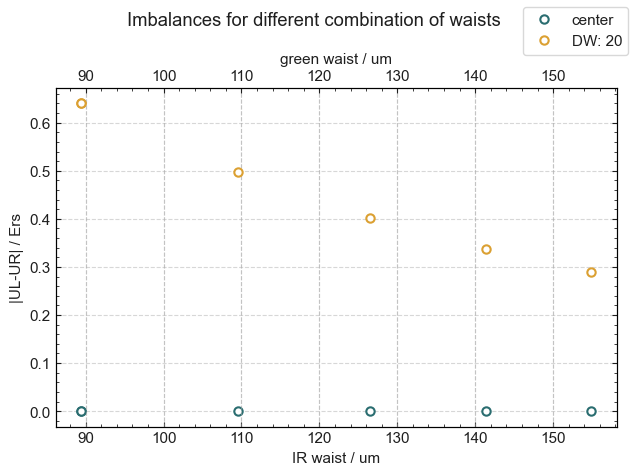

In [31]:
SL_params = {
    # "Vs": Vs,
    # "Vl": Vl,
    "Vs": 100 * Ers / 4,
    "Vl": 100 * Ers / 4,
    "green_waist": green_waist,
    "ir_waist": ir_waist,
    "phi_s": 0,
    "phi_l": 0,
}


# irwaists = np.array([80, 100, 120, 150]) * 1e-6
# grwaists = np.array([50, 80, 100, 120]) * 1e-6


grwaists_hor = np.array([100, 100, 150, 200, 250, 300]) * 1e-6
irwaists_hor = np.array([100, 100, 150, 200, 250, 300]) * 1e-6

grwaist_vert = 80e-6
irwaist_vert = 80e-6

grwaists = np.sqrt(grwaists_hor * grwaist_vert)
irwaists = np.sqrt(irwaists_hor * irwaist_vert)


edgeindex = 20

min_pot = []
min_pot_c = []
for grw, irw in zip(grwaists, irwaists):
    update_params = SL_params | {"green_waist": grw, "ir_waist": irw}
    # print(update_params)
    center = DW(SL(**update_params), 0)
    edge = DW(SL(**update_params), edgeindex)
    # edge.plotDW()
    min_pot.append(edge.min_pot)
    min_pot_c.append(center.min_pos)

    # s =(f"w_g geom: {grw/1e-6:.0f} um, w_gver: {grwaist_vert/1e-6:.0f} um",
    #     f"w_g hor: {grw**2/grwaist_vert/1e-6:.0f} um")
    # s = f"w_g geom: {grw/1e-6:.0f} um, w_gver: {grwaist_vert/1e-6:.0f} um"+\
    #     f"w_g hor: {grw**2/grwaist_vert/1e-6:.0f} um"
    s = (
        f"GREEN: geom waist: {grw/1e-6:.0f} um, vert: {grwaist_vert/1e-6:.0f} um,"
        + f"hor: {grw**2/grwaist_vert/1e-6:.0f} um"
    )
    print(s)
    print(
        f"\tPower per beam = {center._DW__SL_instance.green_lattice.beams[0].power:.2f} W"
    )
    print(
        f"\tLattice depth = {center._DW__SL_instance.green_lattice.beams[0].depth*4/Ers:.2f} Ers\n"
    )
    s = (
        f"IR: geom waist: {irw/1e-6:.0f} um, vert: {irwaist_vert/1e-6:.0f} um, "
        + f"hor: {irw**2/irwaist_vert/1e-6:.0f} um"
    )
    print(s)
    print(
        f"\tPower per beam = {center._DW__SL_instance.ir_lattice.beams[0].power:.2f} W"
    )
    print(
        f"\tLattice depth = {center._DW__SL_instance.ir_lattice.beams[0].depth*4/Ers:.2f} Ers\n"
    )


plt.figure()
min_pot = np.array(min_pot)
min_pot_c = np.array(min_pot_c)

plt.plot(
    irwaists / 1e-6,
    np.abs(min_pot_c[:, 0] - min_pot_c[:, 1]),
    "o",
    label="center",
)
plt.xlabel("IR waist / um")
plt.ylabel("|UL-UR| / Ers")


plt.twiny()
plt.plot(
    grwaists / 1e-6,
    np.abs(min_pot[:, 0] - min_pot[:, 1]),
    "o",
    label=f"DW: {edgeindex}",
    color="C1",
)
plt.xlabel("green waist / um")


plt.suptitle("Imbalances for different combination of waists")
plt.gcf().legend()
plt.tight_layout()
# plt.plot(min_pot[:,1], ".",)

## Fixing $w_{IR}$

Fix the waist of the IR beams and explore how the waist of the green beam affects the depth

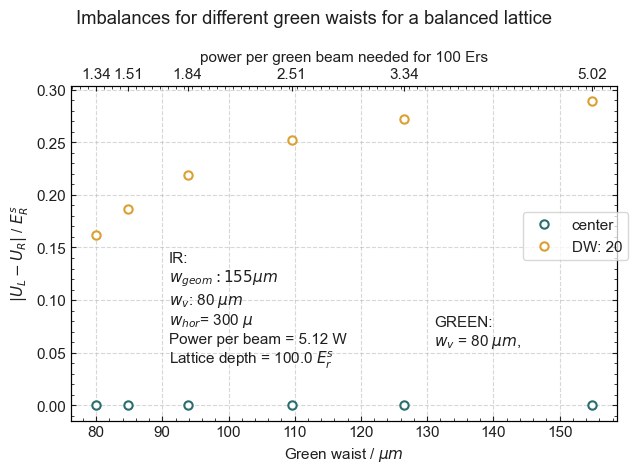

In [32]:
SL_params = {
    "Vs": 100 * Ers / 4,
    "Vl": 100 * Ers / 4,
    "green_waist": green_waist,
    "ir_waist": ir_waist,
    "phi_s": 0,
    "phi_l": 0,
}


# Set the horizontal waists
grwaists_hor = np.array([80, 90, 110, 150, 200, 300]) * 1e-6
irwaists_hor = np.ones_like(grwaists_hor) * 300e-6


# set the VERTICAL WAIST
grwaist_vert = 80e-6
irwaist_vert = 80e-6


# GEOMETRIC MEAN
grwaists = np.sqrt(grwaists_hor * grwaist_vert)
irwaists = np.sqrt(irwaists_hor * irwaist_vert)


# Farthest to wathc
edgeindex = 20

min_pot = []
min_pot_c = []
green_power = []

for grw, irw in zip(grwaists, irwaists):
    update_params = SL_params | {"green_waist": grw, "ir_waist": irw}

    # Define the DW
    center = DW(SL(**update_params), 0)
    edge = DW(SL(**update_params), edgeindex)
    # plt.figure("DW Plot")
    # edge.plotDW()

    grP = center._DW__SL_instance.green_lattice.beams[0].power
    green_power.append(grP)

    min_pot.append(edge.min_pot)
    min_pot_c.append(center.min_pot)

    sgr = (
        f"GREEN: $w_{{geom}}$ = {grw/1e-6:.0f} $\\mu m$$,\n"
        f"$w_v$ = {grwaist_vert/1e-6:.0f} $\\mu m$,\n"
        + f"hor: {grw**2/grwaist_vert/1e-6:.0f} $\\mu m$"
    )


sir = (
    f"IR:\n$w_{{geom}}: {irw/1e-6:.0f} \\mu m$\n"
    f"$w_v$: {irwaist_vert/1e-6:.0f} $\\mu m$\n"
    f"$w_{{hor}} $= {irw**2/irwaist_vert/1e-6:.0f} $\\mu $\n"
    f"Power per beam = {center._DW__SL_instance.ir_lattice.beams[0].power:.2f} W\n"
    f"Lattice depth = {center._DW__SL_instance.ir_lattice.beams[0].depth*4/Ers:.1f} $E_r^s$"
)
sgr = (
    f"GREEN:\n" f"$w_v$ = {grwaist_vert/1e-6:.0f} $\\mu m$,\n"
    # f"hor: {grw**2/grwaist_vert/1e-6:.0f} $\\mu m$"
)


plt.figure()
min_pot = np.array(min_pot)
min_pot_c = np.array(min_pot_c)

plt.plot(
    grwaists / 1e-6,
    np.abs(min_pot_c[:, 0] - min_pot_c[:, 1]),
    "o",
    label="center",
)
plt.plot(
    grwaists / 1e-6,
    np.abs(min_pot[:, 0] - min_pot[:, 1]),
    "o",
    label=f"DW: {edgeindex}",
    color="C1",
)
plt.text(91, 0.04, sir)
plt.text(131, 0.04, sgr)

plt.xlabel("Green waist / $\\mu m$")
plt.ylabel("$|U_L-U_R|$ / $E_R^s$")


axw = plt.gca()
ax2 = plt.twiny()
ax2.set_xlim(axw.get_xlim())
ax2.set_xticks(grwaists / 1e-6)
ax2.set_xticklabels([f"{i:.2f}" for i in green_power])


plt.grid()
# # plt.gca().tick_params(axis="x") #colors=plt.gca().lines[-1].get_color())
plt.xlabel("power per green beam needed for 100 Ers")
plt.suptitle("Imbalances for different green waists for a balanced lattice")
plt.gcf().legend(loc="center right")
plt.tight_layout()

c:\Users\janet\ownCloud - Janet Qesja (jqesja)@datashare.mpcdf.mpg.de\phd_code\fermiqp_physics\fermiqp-physics\lattice\opticallattice.py:527: UserWarning: E-field calculation doesn't account for power
  warnings.warn("E-field calculation doesn't account for power")


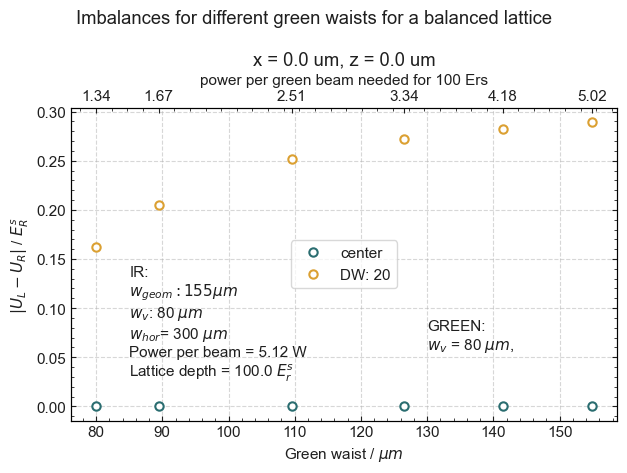

In [33]:
"""
Different x
"""

SL_params = {
    # "Vs": Vs,
    # "Vl": Vl,
    "Vs": 100 * Ers / 4,
    "Vl": 100 * Ers / 4,
    "green_waist": green_waist,
    "ir_waist": ir_waist,
    "phi_s": 0,
    "phi_l": 0,
}


# Set the horizontal waists

grwaists_hor = np.array([80, 100, 150, 200, 250, 300]) * 1e-6
irwaists_hor = np.ones_like(grwaists_hor) * 300e-6


# set the VERTICAL WAIST
grwaist_vert = 80e-6
irwaist_vert = 80e-6


# GEOMETRIC MEAN
grwaists = np.sqrt(grwaists_hor * grwaist_vert)
irwaists = np.sqrt(irwaists_hor * irwaist_vert)


# Farthest to wathc
edgeindex = 20

min_pot = []
min_pot_c = []
green_power = []

for grw, irw in zip(grwaists, irwaists):
    update_params = SL_params | {"green_waist": grw, "ir_waist": irw}

    # print(grw / 1e-6, irw / 1e-6)

    # Define the DW
    center = DW(SL(**update_params), 0, x=0, z=0)
    edge = DW(SL(**update_params), edgeindex, x=0, z=0)

    # plt.figure("DW Plot")
    # edge.plotDW()

    grP = center._DW__SL_instance.green_lattice.beams[0].power
    green_power.append(grP)

    min_pot.append(edge.min_pot)
    min_pot_c.append(center.min_pot)

sgr = (
    f"GREEN:\n" f"$w_v$ = {grwaist_vert/1e-6:.0f} $\\mu m$,\n"
    # f"hor: {grw**2/grwaist_vert/1e-6:.0f} $\\mu m$"
)


sir = (
    f"IR:\n$w_{{geom}}: {irw/1e-6:.0f} \\mu m$\n"
    f"$w_v$: {irwaist_vert/1e-6:.0f} $\\mu m$\n"
    f"$w_{{hor}} $= {irw**2/irwaist_vert/1e-6:.0f} $\\mu m $\n"
    f"Power per beam = {center._DW__SL_instance.ir_lattice.beams[0].power:.2f} W\n"
    f"Lattice depth = {center._DW__SL_instance.ir_lattice.beams[0].depth*4/Ers:.1f} $E_r^s$"
)


plt.figure()
min_pot = np.array(min_pot)
min_pot_c = np.array(min_pot_c)

plt.text(85, 0.03, sir)
plt.text(130, 0.04, sgr)

plt.plot(
    grwaists / 1e-6,
    np.abs(min_pot_c[:, 0] - min_pot_c[:, 1]),
    "o",
    label="center",
)

plt.plot(
    grwaists / 1e-6,
    np.abs(min_pot[:, 0] - min_pot[:, 1]),
    "o",
    label=f"DW: {edgeindex}",
    color="C1",
)
plt.xlabel("Green waist / $\\mu m$")
plt.ylabel("$|U_L-U_R|$ / $E_R^s$")
plt.legend(loc="center")

axw = plt.gca()
ax2 = plt.twiny()
ax2.set_xlim(axw.get_xlim())
ax2.set_xticks(grwaists / 1e-6)
ax2.set_xticklabels([f"{i:.2f}" for i in green_power])
plt.grid()
plt.xlabel("power per green beam needed for 100 Ers")

plt.title(f"x = {center.x/1e-6:.1f} um, z = {center.z/1e-6:.1f} um")
plt.suptitle("Imbalances for different green waists for a balanced lattice")
plt.tight_layout()
# sgr = (
#     f"GREEN:\n"
#     f"$w_v$ = {grwaist_vert/1e-6:.0f} $\\mu m$,\n"
#     # f"hor: {grw**2/grwaist_vert/1e-6:.0f} $\\mu m$"
# )


# sir = (
#     f"IR:\n$w_{{geom}}: {irw/1e-6:.0f} \\mu m$\n"
#     f"$w_v$: {irwaist_vert/1e-6:.0f} $\\mu m$\n"
#     f"$w_{{hor}} $= {irw**2/irwaist_vert/1e-6:.0f} $\\mu m $\n"
#     f"Power per beam = {center._DW__SL_instance.ir_lattice.beams[0].power:.2f} W\n"
#     f"Lattice depth = {center._DW__SL_instance.ir_lattice.beams[0].depth*4/Ers:.1f} $E_r^s$"
# )


# plt.figure()
# min_pot = np.array(min_pot)
# min_pot_c = np.array(min_pot_c)

# plt.text(85, 0.03, sir)
# plt.text(130, 0.04, sgr)

# plt.plot(
#     grwaists / 1e-6,
#     np.abs(min_pot_c[:, 0] - min_pot_c[:, 1]),
#     "o",
#     label="center",
# )

# plt.plot(
#     grwaists / 1e-6,
#     np.abs(min_pot[:, 0] - min_pot[:, 1]),
#     "o",
#     label=f"DW: {edgeindex}",
#     color="C1",
# )
# plt.xlabel("Green waist / $\\mu m$")
# plt.ylabel("$|U_L-U_R|$ / $E_R^s$")
# plt.legend(loc="center")

# axw = plt.gca()
# ax2 = plt.twiny()
# ax2.set_xlim(axw.get_xlim())
# ax2.set_xticks(grwaists / 1e-6)
# ax2.set_xticklabels([f"{i:.2f}" for i in green_power])
# plt.grid()
# plt.xlabel("power per green beam needed for 100 Ers")

# plt.title(f"x = {center.x/1e-6:.1f} um, z = {center.z/1e-6:.1f} um")
# plt.suptitle("Imbalances for different green waists for a balanced lattice")
# plt.tight_layout()

### $W_{IR}$

c:\Users\janet\ownCloud - Janet Qesja (jqesja)@datashare.mpcdf.mpg.de\phd_code\fermiqp_physics\fermiqp-physics\lattice\opticallattice.py:527: UserWarning: E-field calculation doesn't account for power
  warnings.warn("E-field calculation doesn't account for power")


{'Vl': 171000.0,
 'Vs': -61391.86054039425,
 'green_waist': 0.00014,
 'ir_waist': 0.00011832159566199231,
 'phi_l': 0,
 'phi_s': 0}


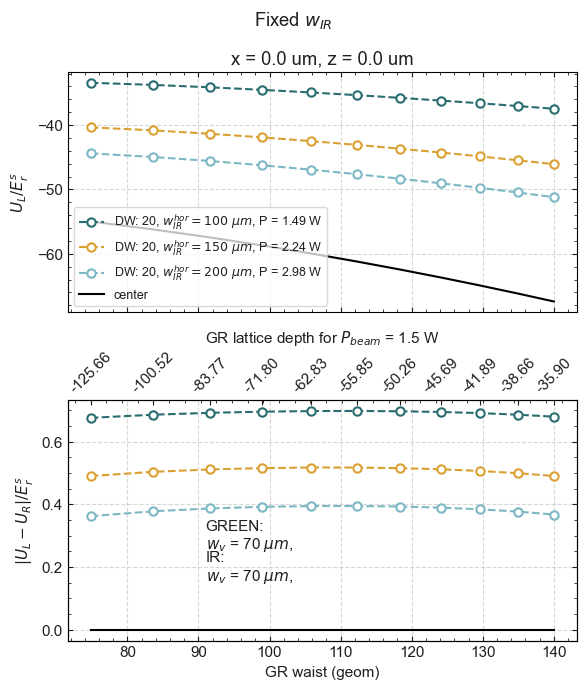

In [34]:
SL_params = {
    # "Vs": Vs,
    # "Vl": Vl,
    "Vs": 100 * Ers / 4,
    "Vl": 100 * Ers / 4,
    "green_waist": green_waist,
    "ir_waist": ir_waist,
    "phi_s": 0,
    "phi_l": 0,
}


fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
gr_powerbeam = 1.5


for irhor in np.arange(100, 201, 50) * 1e-6:
    # HORIZONTALA WAISTS
    grwaists_hor = np.arange(80, 300, 20) * 1e-6
    irwaists_hor = np.ones_like(grwaists_hor) * irhor

    # VERTICAL WAISTS
    grwaist_vert = 70e-6
    irwaist_vert = 70e-6

    # GEOMETICAL mean
    grwaists = np.sqrt(grwaists_hor * grwaist_vert)
    irwaists = np.sqrt(irwaists_hor * irwaist_vert)

    edgeindex = 20

    min_pot = []
    min_pot_c = []
    green_power = []
    green_depth = []

    for grw, irw in zip(grwaists, irwaists):
        update_params = SL_params | {
            "green_waist": grw,
            "ir_waist": irw,
            "Vs": power2freq(power=gr_powerbeam, waist=grw),
        }
        # print(grw/1e-6, irw/1e-6)
        # print(update_params)
        # plt.figure("DW Plot")
        center = DW(SL(**update_params), 0)
        edge = DW(SL(**update_params), edgeindex)
        # edge.plotDW()

        # pprint.pprint()

        min_pot.append(edge.min_pot)
        min_pot_c.append(center.min_pot)
        grP = center._DW__SL_instance.green_lattice.beams[0].power
        grV = center._DW__SL_instance.green_lattice.beams[0].depth
        green_power.append(grP)
        green_depth.append(grV * 4)
    irP = center._DW__SL_instance.ir_lattice.beams[0].power
    min_pot = np.array(min_pot)
    min_pot_c = np.array(min_pot_c)

    axs[0].plot(
        grwaists / 1e-6,
        min_pot[:, 0],
        "o",
        linestyle="--",
        label=f"DW: {edgeindex}, $w_{{IR}}^{{hor}} ={irhor/1e-6:.0f} \\ \\mu m$, P = {irP:.2f} W",
    )
    axs[1].plot(
        grwaists / 1e-6,
        np.abs(min_pot[:, 0] - min_pot[:, 1]),
        "o",
        linestyle="--",
        label=f"DW: {edgeindex}, $w_{{IR}}^{{hor}} ={irhor/1e-6:.0f} \\mu m$",
    )

sir = (
    f"IR:\n" f"$w_v$ = {irwaist_vert/1e-6:.0f} $\\mu m$,\n"
    # f"hor: {grw**2/grwaist_vert/1e-6:.0f} $\\mu m$"
)
plt.text(91, 0.10, sir)
sgr = (
    f"GREEN:\n" f"$w_v$ = {grwaist_vert/1e-6:.0f} $\\mu m$,\n"
    # f"hor: {grw**2/grwaist_vert/1e-6:.0f} $\\mu m$"
)
plt.text(91, 0.20, sgr)
# plt.title("Imbalance for different combination of waists")
# axs[0].legend(fontsize=9)
# plt.xlabel("Green waist / um")
# plt.ylabel("$|U_L-U_R|$ / Ers")
# plt.tight_layout()


axs[0].plot(
    grwaists / 1e-6,
    min_pot_c[:, 0],
    # "o",
    linestyle="-",
    label="center",  # $w_{{GR}}$ hor ={grhor/1e-6:.0f} um",
    color="k",
)
axs[1].plot(
    grwaists / 1e-6,
    np.abs(min_pot_c[:, 0] - min_pot_c[:, 1]),
    # "o",
    linestyle="-",
    label="center",  # $w_{{GR}}$ hor ={grhor/1e-6:.0f} um",
    color="k",
)

axs[1].set_ylabel("$|U_L - U_R| / E_r^s$")
# plt.legend(fontsize=10)
axs[1].set_xlabel("GR waist (geom)")
axs[0].set_ylabel("$U_L / E_r^s$")


axw = axs[1]
axp = plt.twiny()
axp.set_xlim(axw.get_xlim())
axp.set_xticks(
    grwaists / 1e-6,
)
axp.set_xticklabels([f"{p/Ers:.2f}" for p in green_depth], rotation=45)
axp.set_xlabel(f"GR lattice depth for $P_{{beam}}$ = {gr_powerbeam} W")
plt.grid()
axs[0].legend(fontsize=9)
fig.set_size_inches(6, 7)
axs[0].set_title(f"x = {center.x/1e-6:.1f} um, z = {center.z/1e-6:.1f} um")
fig.suptitle("Fixed $w_{IR}$")

fig.tight_layout()

pprint.pprint(center._DW__SL_instance.latt_params)

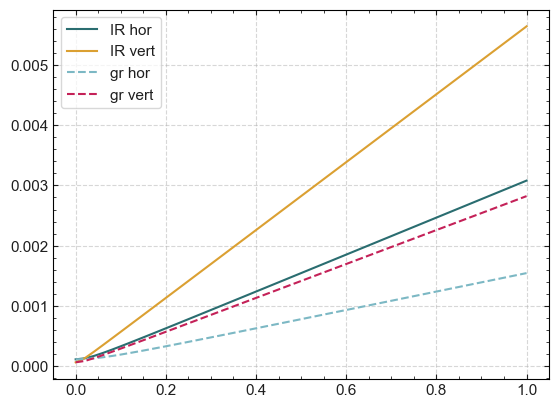

In [35]:
bir = EllipticalGaussianBeam(waistx=110e-6, waisty=60e-6)
bgr = EllipticalGaussianBeam(waistx=110e-6, waisty=60e-6, wavelen=532e-9)
zax = np.linspace(0, 1)

ws = bir.getWaist(zax)
plt.plot(zax, ws[0], label="IR hor")
plt.plot(zax, ws[1], label="IR vert")

ws = bgr.getWaist(zax)
plt.plot(zax, ws[0], label="gr hor", linestyle="--")
plt.plot(zax, ws[1], label="gr vert", linestyle="--")

plt.legend()

## Fix $w_{GR}$

c:\Users\janet\ownCloud - Janet Qesja (jqesja)@datashare.mpcdf.mpg.de\phd_code\fermiqp_physics\fermiqp-physics\lattice\opticallattice.py:527: UserWarning: E-field calculation doesn't account for power
  warnings.warn("E-field calculation doesn't account for power")


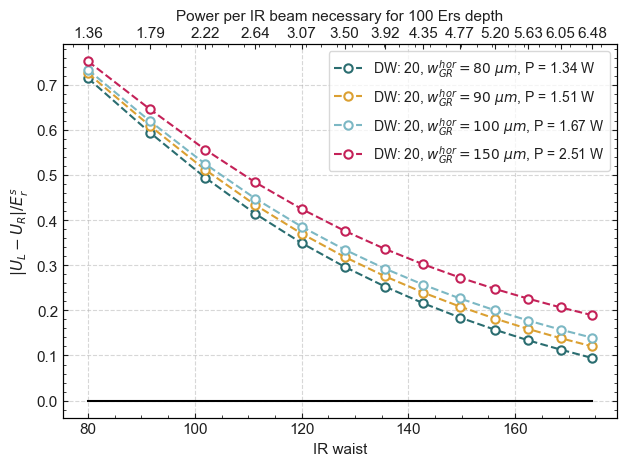

In [36]:
SL_params = {
    # "Vs": Vs,
    # "Vl": Vl,
    "Vs": 100 * Ers / 4,
    "Vl": 100 * Ers / 4,
    "green_waist": green_waist,
    "ir_waist": ir_waist,
    "phi_s": 0,
    "phi_l": 0,
}


# for grhor in np.arange(80, 150, 10) * 1e-6:
for grhor in np.array([80, 90, 100, 150]) * 1e-6:
    # HORIZONTAL
    irwaists_hor = np.arange(80, 400, 25) * 1e-6
    grwaists_hor = np.ones_like(irwaists_hor) * grhor

    # VERTICAL
    grwaist_vert = 80e-6
    irwaist_vert = 80e-6

    # GEOMETRICAL MEAN
    grwaists = np.sqrt(grwaists_hor * grwaist_vert)
    irwaists = np.sqrt(irwaists_hor * irwaist_vert)

    edgeindex = 20

    min_pot = []
    min_pot_c = []
    green_power = []
    ir_power = []

    for grw, irw in zip(grwaists, irwaists):
        update_params = SL_params | {"green_waist": grw, "ir_waist": irw}

        center = DW(SL(**update_params), 0)
        edge = DW(SL(**update_params), edgeindex)

        min_pot.append(edge.min_pot)
        min_pot_c.append(center.min_pot)

        irP = center._DW__SL_instance.ir_lattice.beams[0].power
        ir_power.append(irP)
        # print(irP)
    grP = center._DW__SL_instance.green_lattice.beams[0].power
    green_power.append(grP)

    min_pot = np.array(min_pot)
    min_pot_c = np.array(min_pot_c)

    sir = (
        f"GR: geom waist: {grw/1e-6:.0f} um, vert: {grwaist_vert/1e-6:.0f} um, "
        + f"hor: {grw**2/grwaist_vert/1e-6:.0f} um\n"
        + f"      Power per beam = {center._DW__SL_instance.green_lattice.beams[0].power:.2f} W\n"
        + f"      Lattice depth = {center._DW__SL_instance.green_lattice.beams[0].depth*4/Ers:.2f} Ers"
    )

    plt.plot(
        irwaists / 1e-6,
        np.abs(min_pot[:, 0] - min_pot[:, 1]),
        "o",
        linestyle="--",
        label=f"DW: {edgeindex}, $w_{{GR}}^{{hor}} ={grhor/1e-6:.0f} \\ \\mu m$, P = {grP:.2f} W",
    )


plt.legend(fontsize=10)
plt.xlabel("IR waist")
plt.ylabel("$|U_L-U_R| / E_r^s$")


plt.plot(
    irwaists / 1e-6,
    np.abs(min_pot_c[:, 0] - min_pot_c[:, 1]),
    # "o",
    linestyle="-",
    label=f"center, wGR hor ={grhor/1e-6:.0f}",
    color="k",
)

axw = plt.gca()
axp = plt.twiny()
axp.set_xlim(axw.get_xlim())
axp.set_xticks(irwaists / 1e-6)
axp.set_xticklabels([f"{p:.2f}" for p in ir_power])
axp.set_xlabel("Power per IR beam necessary for 100 Ers depth")
plt.grid()
plt.tight_layout()

c:\Users\janet\ownCloud - Janet Qesja (jqesja)@datashare.mpcdf.mpg.de\phd_code\fermiqp_physics\fermiqp-physics\lattice\opticallattice.py:527: UserWarning: E-field calculation doesn't account for power
  warnings.warn("E-field calculation doesn't account for power")


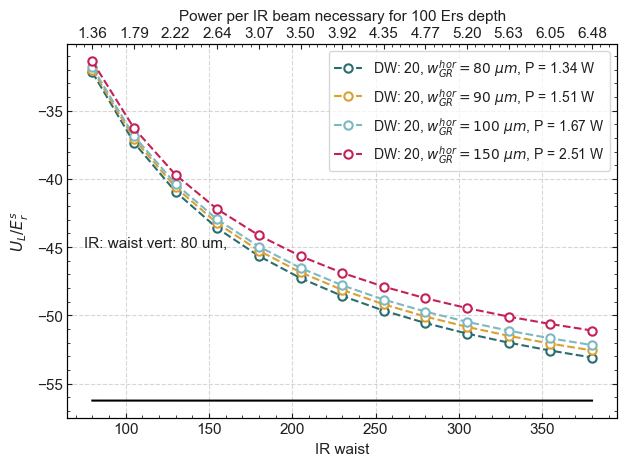

In [37]:
SL_params = {
    # "Vs": Vs,
    # "Vl": Vl,
    "Vs": 100 * Ers / 4,
    "Vl": 100 * Ers / 4,
    "green_waist": green_waist,
    "ir_waist": ir_waist,
    "phi_s": 0,
    "phi_l": 0,
}


# for grhor in np.arange(80, 150, 10) * 1e-6:
for grhor in np.array([80, 90, 100, 150]) * 1e-6:
    # HORIZONTAL
    irwaists_hor = np.arange(80, 400, 25) * 1e-6
    grwaists_hor = np.ones_like(irwaists_hor) * grhor

    # VERTICAL
    grwaist_vert = 80e-6
    irwaist_vert = 80e-6

    # GEOMETRICAL MEAN
    grwaists = np.sqrt(grwaists_hor * grwaist_vert)
    irwaists = np.sqrt(irwaists_hor * irwaist_vert)

    edgeindex = 20

    min_pot = []
    min_pot_c = []
    green_power = []
    ir_power = []

    for grw, irw in zip(grwaists, irwaists):
        update_params = SL_params | {"green_waist": grw, "ir_waist": irw}

        center = DW(SL(**update_params), 0)
        edge = DW(SL(**update_params), edgeindex)

        min_pot.append(edge.min_pot)
        min_pot_c.append(center.min_pot)

        irP = center._DW__SL_instance.ir_lattice.beams[0].power
        ir_power.append(irP)
        # print(irP)
    grP = center._DW__SL_instance.green_lattice.beams[0].power
    green_power.append(grP)

    min_pot = np.array(min_pot)
    min_pot_c = np.array(min_pot_c)

    sir = (
        f"GR: geom waist: {grw/1e-6:.0f} um, vert: {grwaist_vert/1e-6:.0f} um, "
        + f"hor: {grw**2/grwaist_vert/1e-6:.0f} um\n"
        + f"      Power per beam = {center._DW__SL_instance.green_lattice.beams[0].power:.2f} W\n"
        + f"      Lattice depth = {center._DW__SL_instance.green_lattice.beams[0].depth*4/Ers:.2f} Ers"
    )

    plt.plot(
        irwaists_hor / 1e-6,
        min_pot[:, 0],
        "o",
        linestyle="--",
        label=f"DW: {edgeindex}, $w_{{GR}}^{{hor}} ={grhor/1e-6:.0f} \\ \\mu m$, P = {grP:.2f} W",
    )


plt.legend(fontsize=10)
plt.xlabel("IR waist")
plt.ylabel("$U_L / E_r^s$")

sir = f"IR: waist vert: {irwaist_vert/1e-6:.0f} um, "
plt.text(75, -45, sir)

plt.plot(
    irwaists_hor / 1e-6,
    min_pot_c[:, 0],
    # "o",
    linestyle="-",
    label=f"center, wGR hor ={grhor/1e-6:.0f}",
    color="k",
)

axw = plt.gca()
axp = plt.twiny()
axp.set_xlim(axw.get_xlim())
axp.set_xticks(irwaists_hor / 1e-6)
axp.set_xticklabels([f"{p:.2f}" for p in ir_power])
axp.set_xlabel("Power per IR beam necessary for 100 Ers depth")
plt.grid()
plt.tight_layout()

c:\Users\janet\ownCloud - Janet Qesja (jqesja)@datashare.mpcdf.mpg.de\phd_code\fermiqp_physics\fermiqp-physics\lattice\opticallattice.py:527: UserWarning: E-field calculation doesn't account for power
  warnings.warn("E-field calculation doesn't account for power")


{'Vl': -45236.107766606285,
 'Vs': 171000.0,
 'green_waist': 0.00010246950765959597,
 'ir_waist': 0.0001630950643030009,
 'phi_l': 0,
 'phi_s': 0}


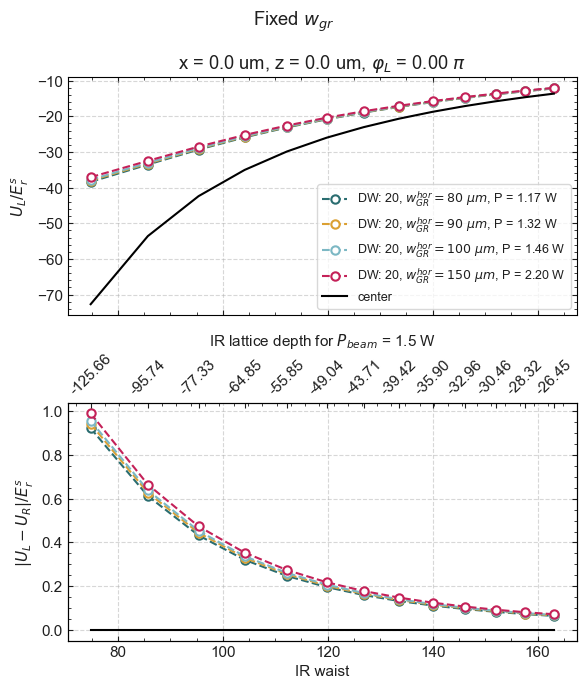

In [38]:
SL_params = {
    # "Vs": Vs,
    # "Vl": Vl,
    "Vs": 100 * Ers / 4,
    "Vl": 100 * Ers / 4,
    "green_waist": green_waist,
    "ir_waist": ir_waist,
    "phi_s": 0,
    "phi_l": 0,  # 0.73*pi/4,
}

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)

# for grhor in np.arange(80, 150, 10) * 1e-6:
for grhor in np.array([80, 90, 100, 150]) * 1e-6:
    # for grhor in np.array([100]) * 1e-6:

    # HORIZONTAL
    irwaists_hor = np.arange(80, 400, 25) * 1e-6
    grwaists_hor = np.ones_like(irwaists_hor) * grhor

    # VERTICAL
    grwaist_vert = 70e-6
    irwaist_vert = 70e-6

    # GEOMETRICAL MEAN
    grwaists = np.sqrt(grwaists_hor * grwaist_vert)
    irwaists = np.sqrt(irwaists_hor * irwaist_vert)

    edgeindex = 20

    min_pot = []
    min_pot_c = []
    green_power = []
    ir_depth = []
    ir_powerpbeam = 1.5

    for grw, irw in zip(grwaists, irwaists):
        update_params = SL_params | {
            "green_waist": grw,
            "ir_waist": irw,
            "Vl": power2freq(power=ir_powerpbeam, waist=irw),
        }

        center = DW(SL(**update_params), 0, x=0, z=0)
        # plt.figure("DW")
        # center.plotDW()
        edge = DW(SL(**update_params), edgeindex, x=0, z=0)

        min_pot.append(edge.min_pot)
        min_pot_c.append(center.min_pot)

        irV = center._DW__SL_instance.ir_lattice.beams[0].depth
        ir_depth.append(irV * 4)

        # print(center._DW__SL_instance.ir_lattice.beams[0].depth)
        # print(center._DW__SL_instance.ir_lattice.beams[0].power)
        # print(center._DW__SL_instance.ir_lattice.beams[0].waist / 1e-6)
        # print(irP)
    grP = center._DW__SL_instance.green_lattice.beams[0].power
    green_power.append(grP)

    min_pot = np.array(min_pot)
    min_pot_c = np.array(min_pot_c)

    sir = (
        f"GR: geom waist: {grw/1e-6:.0f} um, vert: {grwaist_vert/1e-6:.0f} um, "
        + f"hor: {grw**2/grwaist_vert/1e-6:.0f} um\n"
        + f"      Power per beam = {center._DW__SL_instance.green_lattice.beams[0].power:.2f} W\n"
        + f"      Lattice depth = {center._DW__SL_instance.green_lattice.beams[0].depth*4/Ers:.2f} Ers"
    )

    # plt.figure("Minimum")
    axs[0].plot(
        irwaists / 1e-6,
        min_pot[:, 0],
        "o",
        linestyle="--",
        label=f"DW: {edgeindex}, $w_{{GR}}^{{hor}} ={grhor/1e-6:.0f} \\ \\mu m$, P = {grP:.2f} W",
    )
    axs[1].plot(
        irwaists / 1e-6,
        np.abs(min_pot[:, 0] - min_pot[:, 1]),
        "o",
        linestyle="--",
        label=f"DW: {edgeindex}, $w_{{GR}}^{{hor}} ={grhor/1e-6:.0f} \\ \\mu m$, P = {grP:.2f} W",
    )


axs[0].plot(
    irwaists / 1e-6,
    min_pot_c[:, 0],
    # "o",
    linestyle="-",
    label="center",  # $w_{{GR}}$ hor ={grhor/1e-6:.0f} um",
    color="k",
)

axs[1].plot(
    irwaists / 1e-6,
    np.abs(min_pot_c[:, 0] - min_pot_c[:, 1]),
    # "o",
    linestyle="-",
    label="center",  # $w_{{GR}}$ hor ={grhor/1e-6:.0f} um",
    color="k",
)

axs[1].set_ylabel("$|U_L - U_R| / E_r^s$")
# plt.legend(fontsize=10)
plt.xlabel("IR waist")
axs[0].set_ylabel("$U_L / E_r^s$")


axw = axs[1]
axp = plt.twiny()
axp.set_xlim(axw.get_xlim())
axp.set_xticks(
    irwaists / 1e-6,
)
axp.set_xticklabels([f"{p/Ers:.2f}" for p in ir_depth], rotation=45)
axp.set_xlabel(f"IR lattice depth for $P_{{beam}}$ = {ir_powerpbeam} W")
plt.grid()
axs[0].legend(fontsize=9)
fig.set_size_inches(6, 7)
axs[0].set_title(
    f"x = {center.x/1e-6:.1f} um, z = {center.z/1e-6:.1f} um, $\\varphi_{{L}}$ = {center._DW__SL_instance.latt_params['phi_l']/pi:.2f} $\\pi$"
)
fig.suptitle("Fixed $w_{gr}$")

plt.tight_layout()

pprint.pprint(center._DW__SL_instance.latt_params)

# Fixing some values

c:\Users\janet\ownCloud - Janet Qesja (jqesja)@datashare.mpcdf.mpg.de\phd_code\fermiqp_physics\fermiqp-physics\lattice\opticallattice.py:527: UserWarning: E-field calculation doesn't account for power
  warnings.warn("E-field calculation doesn't account for power")
c:\Users\janet\ownCloud - Janet Qesja (jqesja)@datashare.mpcdf.mpg.de\phd_code\fermiqp_physics\fermiqp-physics\projects\double_well_potentials\../..\projects\double_well_potentials\doublewells.py:263: UserWarning: \nDiscrepancy between the SL coordinates and the DW Coordinates.
Falling back to DW coordinates: x = 1.8e-05, z = 0
  warnings.warn(
c:\Users\janet\ownCloud - Janet Qesja (jqesja)@datashare.mpcdf.mpg.de\phd_code\fermiqp_physics\fermiqp-physics\projects\double_well_potentials\../..\projects\double_well_potentials\doublewells.py:263: UserWarning: \nDiscrepancy between the SL coordinates and the DW Coordinates.
Falling back to DW coordinates: x = 2.4e-05, z = 0
  warnings.warn(


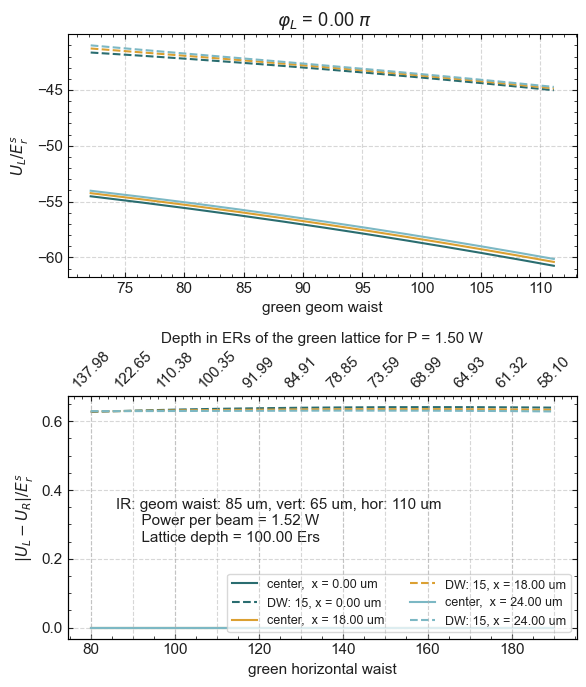

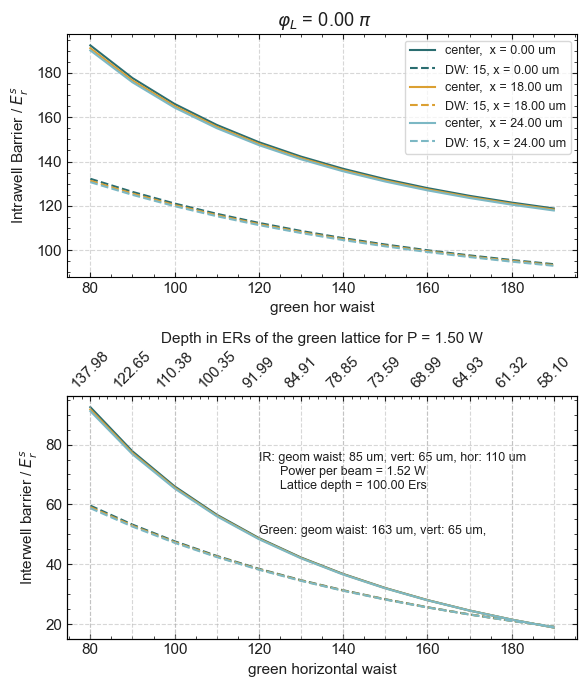

In [39]:
# VERTICAL WAISTS
irwaist_vert = 65e-6
grwaist_vert = 65e-6


irwaist_hor = 110e-6
# grwaists_hor = np.array([110e-6])
grwaists_hor = np.arange(80, 200, 10) * 1e-6

ir_waist = np.sqrt(irwaist_hor * irwaist_vert)
grwaists = np.sqrt(grwaists_hor * grwaist_vert)


SL_params = {
    # "Vs": Vs,
    # "Vl": Vl,
    "Vs": 100 * Ers / 4,
    "Vl": 100 * Ers / 4,
    "green_waist": grwaists[0],
    "ir_waist": ir_waist,
    "phi_s": 0,
    "phi_l": 0,
}


fig, axs = plt.subplots(nrows=2, ncols=1)
figbarr, axsbarr = plt.subplots(nrows=2, ncols=1)


# Farthest to wathc
edgeindex = 15
gr_powerperbeam = 1.5


ls = "--"
# for x, ls in zip([np.arange(1, 100)]*2.2e-6, ["-", "--", ":"]):
# for x in np.arange(0, 21, 5) * 2.2e-6:
for x in np.array([0, 15, 20]) * 1.2e-6:
    # print(x)
    min_pot = []
    min_pot_c = []
    green_power = []
    green_depth = []

    intra_c = []
    intra_e = []
    inter_c = []
    inter_e = []

    for grw in grwaists:
        # print(grw)
        update_params = SL_params | {
            "green_waist": grw,
            "Vs": power2freq(power=gr_powerperbeam, waist=grw, wavelen=532e-9),
        }
        # print(grw / 1e-6, irw / 1e-6)

        # Define the DW
        center = DW(SL(**update_params), 0, x=x, z=0)
        edge = DW(SL(**update_params), edgeindex, x=x, z=0)

        grP = center._DW__SL_instance.green_lattice.beams[0].power
        green_power.append(grP)
        grV = center._DW__SL_instance.green_lattice.beams[0].depth
        green_depth.append(grV * 4)

        min_pot.append(edge.min_pot)
        min_pot_c.append(center.min_pot)

        intra_c.append(center.intrabarrier)
        inter_c.append(center.interbarrier)

        intra_e.append(edge.intrabarrier)
        inter_e.append(edge.interbarrier)

    min_pot = np.array(min_pot)
    min_pot_c = np.array(min_pot_c)

    intra_c = np.array(intra_c)
    intra_e = np.array(intra_e)
    inter_c = np.array(inter_c)
    inter_e = np.array(inter_e)

    axs[0].plot(
        grwaists / 1e-6,
        min_pot_c[:, 0],
        "-",
        label=f"center,  x = {x/1e-6:.2f} um",
    )

    axs[0].plot(
        grwaists / 1e-6,
        min_pot[:, 0],
        linestyle=ls,
        label=f"DW: {edgeindex}, x = {x/1e-6:.2f} um",
        color=axs[0].lines[-1].get_color(),
    )

    axs[1].plot(
        grwaists_hor / 1e-6,
        np.abs(min_pot_c[:, 0] - min_pot_c[:, 1]),
        label=f"center,  x = {x/1e-6:.2f} um",
        color=axs[0].lines[-1].get_color(),
    )

    axs[1].plot(
        grwaists_hor / 1e-6,
        np.abs(min_pot[:, 0] - min_pot[:, 1]),
        linestyle=ls,
        label=f"DW: {edgeindex}, x = {x/1e-6:.2f} um",
        color=axs[0].lines[-1].get_color(),
    )

    axsbarr[0].plot(
        grwaists_hor / 1e-6,
        intra_c[:, 0],
        color=axs[0].lines[-1].get_color(),
        label=f"center,  x = {x/1e-6:.2f} um",
    )

    axsbarr[0].plot(
        grwaists_hor / 1e-6,
        intra_e[:, 0],
        linestyle=ls,
        label=f"DW: {edgeindex}, x = {x/1e-6:.2f} um",
        color=axs[0].lines[-1].get_color(),
    )
    axsbarr[1].plot(
        grwaists_hor / 1e-6,
        inter_c[:, 0],
        color=axs[0].lines[-1].get_color(),
        # label=f"DW,  x = {x/1e-6:.2f} um",
    )

    axsbarr[1].plot(
        grwaists_hor / 1e-6,
        inter_e[:, 0],
        linestyle=ls,
        label=f"DW: {edgeindex}, x = {x/1e-6:.2f} um",
        # color=axs[0].lines[-1].get_color(),
    )


sir = (
    f"IR: geom waist: {ir_waist/1e-6:.0f} um, vert: {irwaist_vert/1e-6:.0f} um, "
    + f"hor: {ir_waist**2/irwaist_vert/1e-6:.0f} um\n"
    + f"      Power per beam = {center._DW__SL_instance.ir_lattice.beams[0].power:.2f} W\n"
    + f"      Lattice depth = {center._DW__SL_instance.ir_lattice.beams[0].depth*4/Ers:.2f} Ers"
)
sgr = f"Green: geom waist: {irw/1e-6:.0f} um, vert: {irwaist_vert/1e-6:.0f} um, "


axs[0].set_xlabel("green geom waist")
axs[0].set_ylabel("$U_L / E_r^s$")
axs[0].set_title(
    # f"x = {center.x/1e-6:.1f} um, z = {center.z/1e-6:.1f} um,"
    f" $\\varphi_{{L}}$ = {center._DW__SL_instance.latt_params['phi_l']/pi:.2f} $\\pi$"
)


axs[1].set_xlabel("green horizontal waist")
axs[1].set_ylabel("$|U_L - U_R| / E_r^s$")
axs[1].text(86, 0.25, sir)
axs[1].legend(fontsize=9, ncols=2, loc=4)


axw = axs[1]
axp = axs[1].twiny()
axp.set_xlim(axw.get_xlim())
axp.set_xticks(
    grwaists_hor / 1e-6,
)
axp.set_xticklabels([f"{p/Ers:.2f}" for p in green_depth], rotation=45)
axp.set_xlabel(f"Depth in ERs of the green lattice for P = {gr_powerperbeam:.2f} W")

fig.set_size_inches(6, 7)
fig.tight_layout()


axsbarr[0].set_xlabel("green hor waist")
axsbarr[0].set_ylabel("Intrawell Barrier / $E_r^s$")
axsbarr[0].set_title(
    # f"x = {center.x/1e-6:.1f} um, z = {center.z/1e-6:.1f} um,"
    f" $\\varphi_{{L}}$ = {center._DW__SL_instance.latt_params['phi_l']/pi:.2f} $\\pi$"
)
axsbarr[0].legend(
    fontsize=9,
)

axsbarr[1].text(120, 65, sir, fontsize=9)
axsbarr[1].text(120, 50, sgr, fontsize=9)

axw = axsbarr[1]
axp = axsbarr[1].twiny()
axp.set_xlim(axw.get_xlim())
axp.set_xticks(
    grwaists_hor / 1e-6,
)
axp.set_xticklabels([f"{p/Ers:.2f}" for p in green_depth], rotation=45)
axp.set_xlabel(f"Depth in ERs of the green lattice for P = {gr_powerperbeam:.2f} W")

axsbarr[1].set_xlabel("green horizontal waist")
axsbarr[1].set_ylabel("Interwell barrier / $E_r^s$")
figbarr.set_size_inches(6, 7)
figbarr.tight_layout()

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='y / um', ylabel='U / $Er_s$'>)

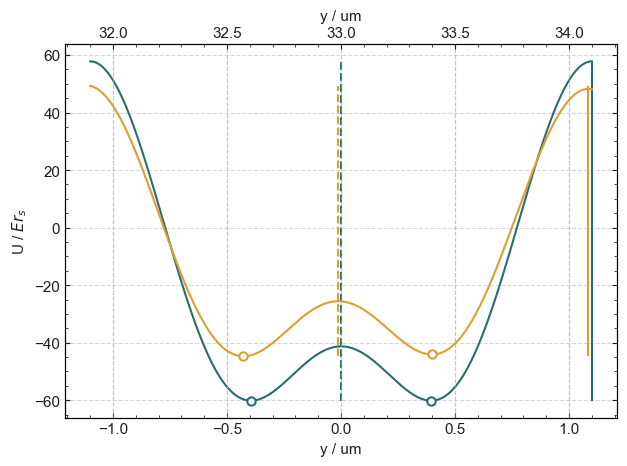

In [40]:
center.plotDW()
plt.twiny()
edge.plotDW(**{"color": "C1"})

# Elliptical Beam

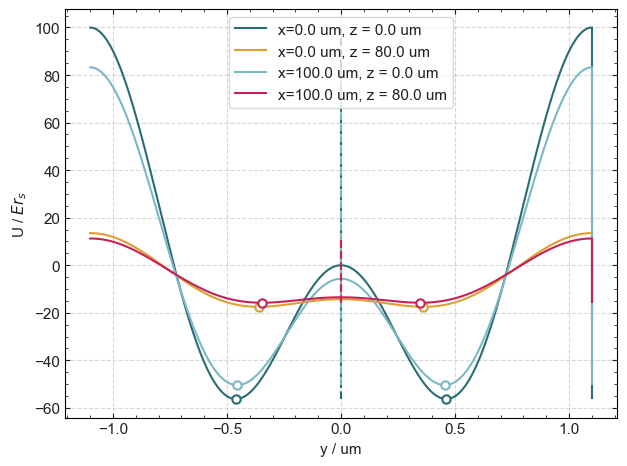

In [ ]:
Erl = 1710
Ers = 6840

# Vl = 1 * Ers /4
Vl = 100 * Ers  # 1 * Ers / 4
Vs = 100 * Ers  # 1 * Ers / 4


gr_waist_ver = 80e-6
ir_waist_ver = 100e-6


gr_waist_hor = 80e-6
ir_waist_hor = 100e-6

ir_waists = [ir_waist_hor, ir_waist_ver]
gr_waists = [gr_waist_hor, gr_waist_ver]

phi_long = 0
phi_short = 0

SL_params = {
    "Vs_lattice": Vl,  # None,
    "Vl_lattice": Vs,  # None,
    "green_waists": [gr_waist_hor, gr_waist_ver],
    "ir_waists": [ir_waist_hor, ir_waist_ver],
    "phi_s": phi_short,
    "phi_l": phi_long,
}

# cn = DW(SL(**SL_params, elliptical=True), 0)
# cn = DW(SL(**SL_params, elliptical=False), 0)

SL1 = SL(**SL_params, elliptical=True, dwindices=[0, 20])
SL2 = SL(**SL_params, elliptical=True, dwindices=[0, 20], z=80e-6)
SL3 = SL(**SL_params, elliptical=True, dwindices=[0, 20], x=100e-6)
SL4 = SL(**SL_params, elliptical=True, dwindices=[0, 20], z=80e-6, x=100e-6)

SL1.dws["0"].plotDW(**{"label": f"x={SL1.x/1e-6:.1f} um, z = {SL1.z/1e-6:.1f} um"})
SL2.dws["0"].plotDW(**{"label": f"x={SL2.x/1e-6:.1f} um, z = {SL2.z/1e-6:.1f} um"})
SL3.dws["0"].plotDW(**{"label": f"x={SL3.x/1e-6:.1f} um, z = {SL3.z/1e-6:.1f} um"})
SL4.dws["0"].plotDW(**{"label": f"x={SL4.x/1e-6:.1f} um, z = {SL4.z/1e-6:.1f} um"})
plt.legend()

# 2D Plots

In [ ]:
# VERTICAL WAISTS
irwaist_vert = 70e-6
grwaist_vert = 70e-6


# HORIZONTAL WAISTS
irwaists_hor = np.linspace(70, 120, 50) * 1e-6
grwaists_hor = np.linspace(70, 120, 50) * 1e-6

irwaists = np.sqrt(irwaists_hor * irwaist_vert)
grwaists = np.sqrt(grwaists_hor * grwaist_vert)

# GEOMETRIC WAISTS
GRW, IRW = np.meshgrid(grwaists, irwaists)

slcoll = np.empty(GRW.shape, dtype=SL)
center = np.empty(GRW.shape, dtype=DW)
edge = np.empty(GRW.shape, dtype=DW)


ir_powerperbeam = gr_powerperbeam = 1.5

edgeindex = 15

SL_params = {
    # "Vs": Vs,
    # "Vl": Vl,
    # "Vs": 100 * Ers / 4,
    # "Vl": 100 * Ers / 4,
    "green_waists": [grwaists_hor, irwaist_vert],
    "ir_waists": [irwaists_hor, grwaist_vert],
    "phi_s": 0,
    "phi_l": pi / 4,
    "green_power_per_beam": 1.5,
    "ir_power_per_beam": 1.5,
}


# slcoll = SL(**(SL_params | {"green_waist": GRW, "ir_waist": IRW}))

for i, irw in enumerate(irwaists_hor):
    for j, grw in enumerate(grwaists_hor):
        params_update = SL_params | {
            "green_waists": [grw, irwaist_vert],
            "ir_waists": [irw, irwaist_vert],
        }

        slcoll[i, j] = SL(
            **params_update,
            dwindices=[0, edgeindex],
        )
        center[i, j] = slcoll[i, j].dws["0"]
        edge[i, j] = slcoll[i, j].dws[str(edgeindex)]

Plot some results

In [43]:
def secondaxis(x):
    return x**2 / grwaist_vert * 1e-6


def irsecondaxis(x):
    return x**2 / irwaist_vert * 1e-6
    # return grwaists_hor


def inversesecondaxis(x):
    return np.sqrt(x * grwaist_vert) / 1e-6


def irinversesecondaxis(x):
    return np.sqrt(x * irwaist_vert) / 1e-6


def plot_attr(attr, lvl=None, idx=0):
    arr_c = []
    arr_e = []

    for i in range(slcoll.shape[0]):
        for j in range(slcoll.shape[1]):
            v_c = center[i, j].__dict__[attr]
            v_e = edge[i, j].__dict__[attr]

            if isinstance(v_c, float):
                arr_c.append(v_c)
                arr_e.append(v_e)
            else:
                arr_c.append(v_c[idx])
                arr_e.append(v_e[idx])

            # w.append(slcoll[i,j].green_lattice.beams[0].depth)
    arr_c = np.array(arr_c).reshape(center.shape)
    arr_e = np.array(arr_e).reshape(center.shape)
    mn = min(arr_c.min(), arr_e.min())
    mx = max(arr_c.max(), arr_e.max())
    if arr_c.shape[1] > 1:
        fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True)

        im = axs[0].pcolor(
            grwaists / 1e-6,
            irwaists / 1e-6,
            arr_c,
            vmin=mn,
            vmax=mx,
        )
        # fig.colorbar(im, label="in Ers", pad=0.15)
        fig.colorbar(im, label="in Ers", pad=0.15, location="bottom")
        axs[0].set_title("Center")
        cs = axs[0].contour(grwaists / 1e-6, irwaists / 1e-6, arr_c, lvl, colors="w")
        axs[0].clabel(cs, lvl, colors="w")

        im = axs[1].pcolor(
            grwaists / 1e-6,
            irwaists / 1e-6,
            arr_e,
            vmin=mn,
            vmax=mx,
        )
        # fig.colorbar(im, location="left")
        # fig.colorbar(im, label="in Ers", pad=0.15)
        fig.colorbar(im, label="in Ers", pad=0.15, location="bottom")
        axs[1].set_title(f"{edgeindex}th DW")
        cs = axs[1].contour(grwaists / 1e-6, irwaists / 1e-6, arr_e, lvl, colors="w")
        axs[1].clabel(cs, lvl, colors="w")

        # axs[1].clabel(cs, lvl, colors="w")
        for ax in axs:
            ax.set_xlabel("Green geometric waist / um")
            ax.grid()
            ax.set_aspect("equal")
            ax01 = ax.secondary_xaxis(
                "top", functions=(irsecondaxis, irinversesecondaxis)
            )
            ax01.set_xlabel("Green horizontal waist / um")
        axs[0].set_ylabel("IR Geometric waist  / um")
        ax02 = axs[1].secondary_yaxis(
            "right", functions=(irsecondaxis, irinversesecondaxis)
        )
        ax02.set_ylabel("IR horizontal waist / um")
        fig.suptitle(
            f"{attr}, $\\varphi_{{IR}}={slcoll[0,0].latt_params['phi_l']/pi:.3f} \\pi$"  # , wgv, wirv = {grwaist_vert/1e-6:.0f} {irwaist_vert/1e-6:.0f} um"
        )

        s = (
            f"$w_{{vert}}^{{IR}} = {irwaist_vert/1e-6}\\ \\mu m$\n"
            f"$w_{{vert}}^{{GR}} = {grwaist_vert/1e-6}\\ \\mu m$\n"
            f"$P_{{beam}}^{{IR}}$={ir_powerperbeam} W\n"
            f"$P_{{beam}}^{{GR}}$={gr_powerperbeam} W"
        )
        fig.text(
            1,
            0.45,
            s,
            transform=fig.transFigure,
            fontsize=10,
            bbox={"pad": 1, "color": "w"},
        )

        # fig.colorbar(
        #     im,
        #     cax=fig.add_axes([0.25, -0.1, 0.5, 0.05]),
        #     label="in Ers",
        #     location="bottom",
        # )

        fig.set_size_inches(7, 5)
        fig.tight_layout()

    return arr_c, arr_e


# plt.pcolor(arr_e)

Text(0.5, 0.98, 'Imbalance $U_L = U_R$, $\\varphi_{IR}=0.250$')

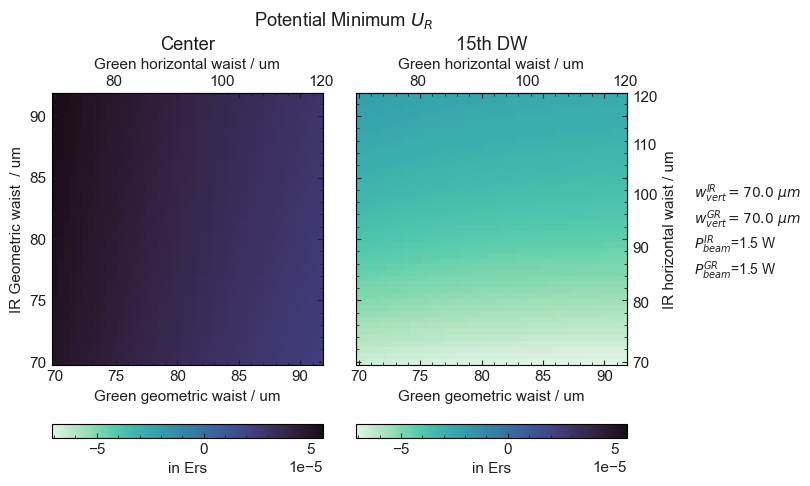

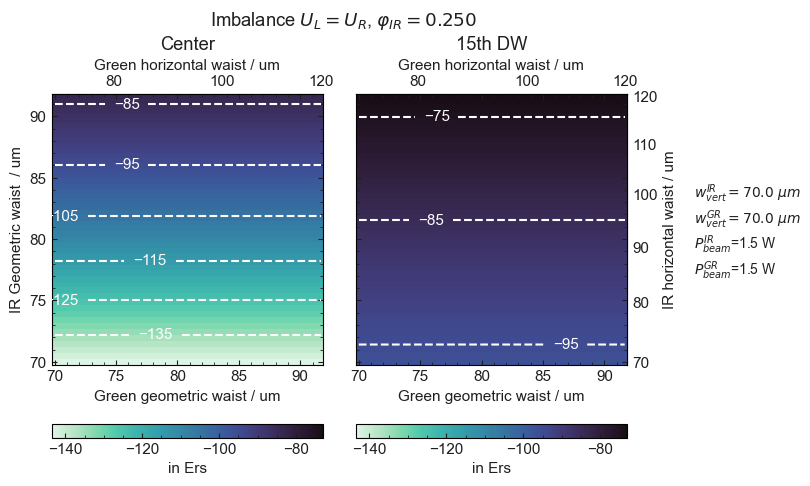

In [44]:
c1, e1 = plot_attr(
    "min_pot", lvl=[-100, -75, -70, -65, -60, -55, -50, -45, -40, -30], idx=1
)
plt.gcf().suptitle("Potential Minimum $U_R$")

# c1, e1 = plot_attr("imbalance", lvl=[-2, -1, -0.5])
c1, e1 = plot_attr("imbalance", lvl=np.arange(-145, -70, 10))
plt.gcf().suptitle(
    f"Imbalance $U_L = U_R$, $\\varphi_{{IR}}={slcoll[0,0].latt_params['phi_l']/pi:.3f}$"
)

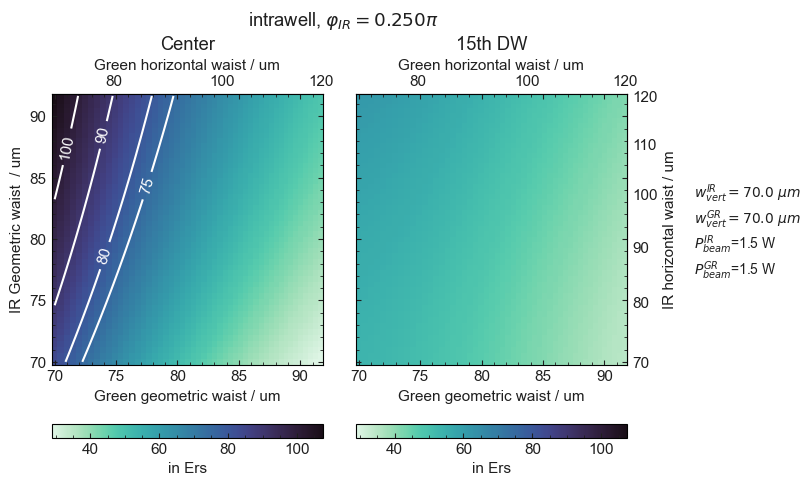

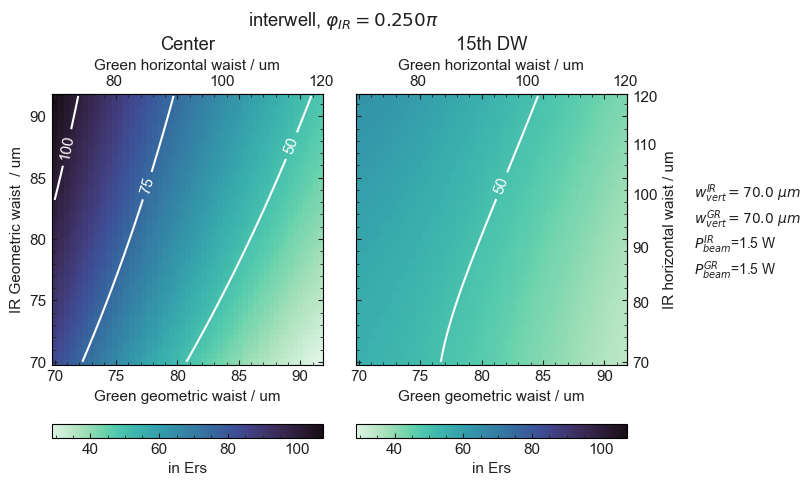

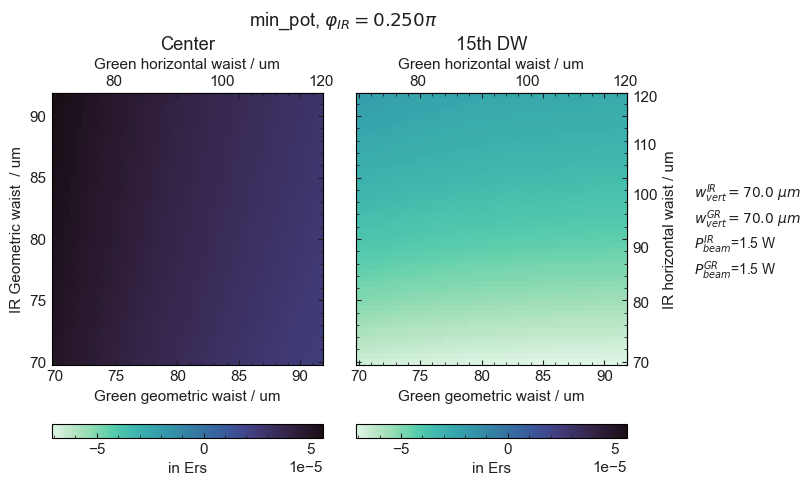

In [45]:
c, e = plot_attr("intrawell", lvl=[75, 80, 90, 100, 110], idx=0)
c, e = plot_attr("interwell", lvl=[0, 25, 50, 75, 100], idx=0)
c1, e1 = plot_attr("min_pot", lvl=[-100, -75, -70, -60, -55, -50, -45, -40, -30], idx=1)

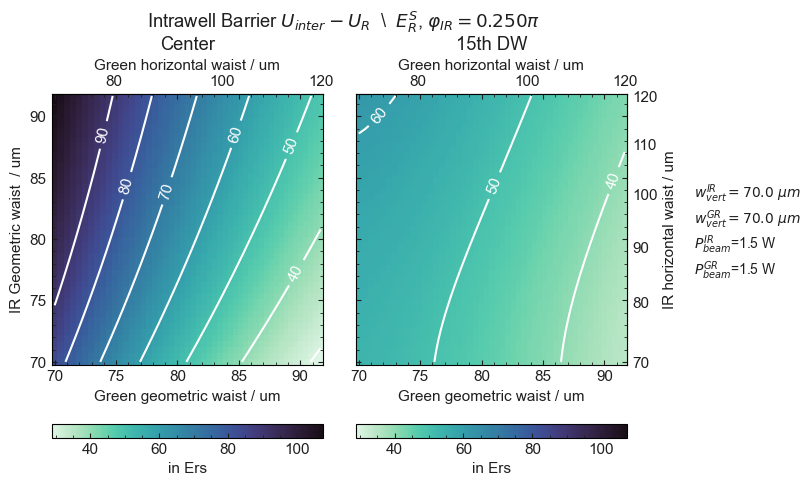

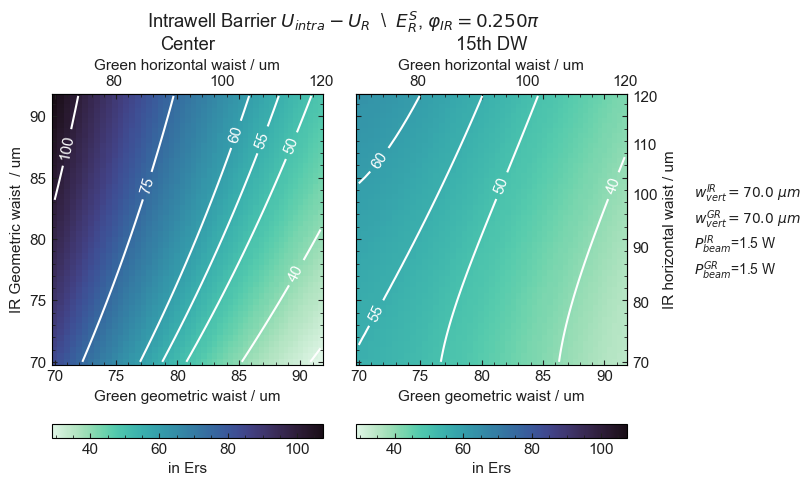

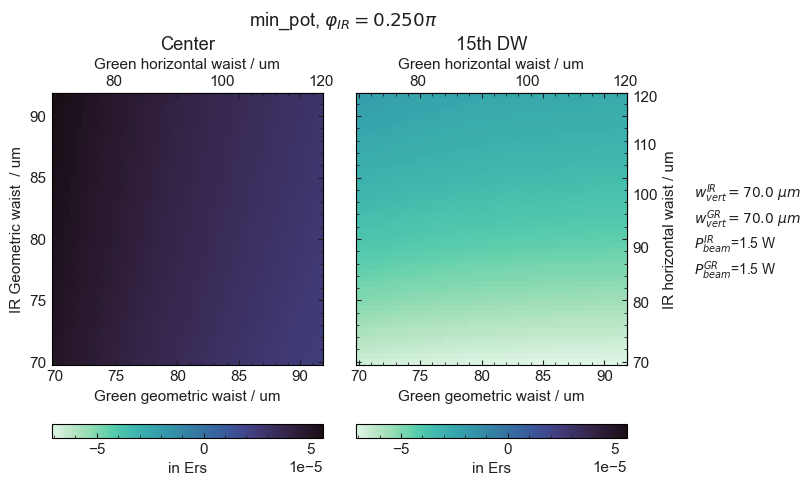

In [ ]:
# c, e = plot_attr("intrabarrier", lvl=[100, 110, 115, 125, 150, 200], idx=1)
c, e = plot_attr("intrabarrier", np.arange(-100, 100, 10), idx=1)
plt.gcf().suptitle(
    f"Intrawell Barrier $U_{{inter}} - U_R$  \\  $E_R^S$, $\\varphi_{{IR}}={slcoll[0,0].latt_params['phi_l']/pi:.3f} \\pi$"
)

c, e = plot_attr("interbarrier", lvl=[0, 25, 30, 40, 50, 55, 60, 75, 100], idx=1)
plt.gcf().suptitle(
    f"Intrawell Barrier $U_{{intra}} - U_R$  \\  $E_R^S$, $\\varphi_{{IR}}={slcoll[0,0].latt_params['phi_l']/pi:.3f}\\pi$"
)

c1, e1 = plot_attr("min_pot", lvl=np.arange(-100, 100, 10), idx=1)

Get Lattice depth from depth of the beams

In [ ]:
irdepth = []
grdepth = []
for i in range(center.shape[0]):
    for j in range(center.shape[1]):
        irdepth.append(slcoll[i, j].ir_lattice.beams[0].depth * 4)
        grdepth.append(slcoll[i, j].green_lattice.beams[0].depth * 4)

irdepth = np.array(irdepth).reshape(slcoll.shape)
grdepth = np.array(grdepth).reshape(slcoll.shape)

Text(1.1, 0.25, '$w_{vert}^{IR} = 70.0\\ \\mu m$\n$w_{vert}^{GR} = 70.0\\ \\mu m$\n$P_{beam}^{IR}$=1.5 W\n$P_{beam}^{GR}$=1.5 W')

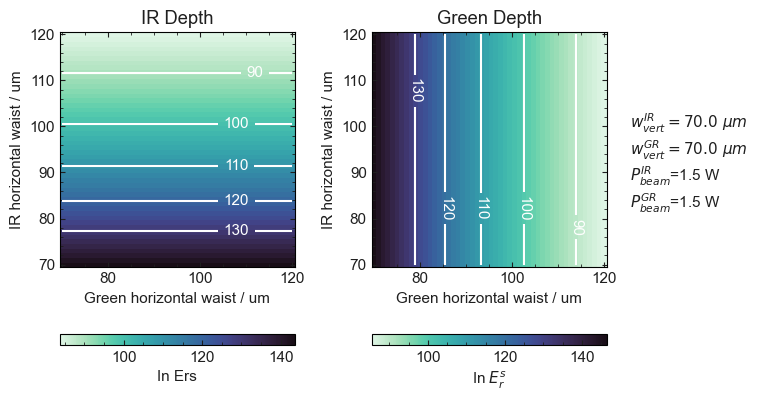

In [ ]:
lvl = [30, 50, 75, 90, 100, 110, 120, 130, 150]


plt.subplot(121)
plt.title("IR Depth")
im = plt.pcolor(grwaists_hor / 1e-6, irwaists_hor / 1e-6, np.abs(irdepth) / Ers)
plt.colorbar(location="bottom", label="In Ers")


cs = plt.contour(
    grwaists_hor / 1e-6, irwaists_hor / 1e-6, np.abs(irdepth) / Ers, lvl, colors="w"
)
plt.clabel(cs, lvl, colors="w")
plt.grid()
plt.gca().set_aspect("equal")
plt.xlabel("Green horizontal waist / um")
plt.ylabel("IR horizontal waist / um")


plt.subplot(122)
plt.title("Green Depth")
plt.pcolor(grwaists_hor / 1e-6, irwaists_hor / 1e-6, grdepth / Ers)
plt.colorbar(label="In $E_r^s$", location="bottom")
plt.gca().set_aspect("equal")
cs = plt.contour(
    grwaists_hor / 1e-6, irwaists_hor / 1e-6, np.abs(grdepth) / Ers, lvl, colors="w"
)
plt.clabel(cs, lvl, colors="w")
plt.grid()
plt.xlabel("Green horizontal waist / um")
plt.ylabel("IR horizontal waist / um")
plt.tight_layout()


s = (
    f"$w_{{vert}}^{{IR}} = {irwaist_vert/1e-6}\\ \\mu m$\n"
    f"$w_{{vert}}^{{GR}} = {grwaist_vert/1e-6}\\ \\mu m$\n"
    f"$P_{{beam}}^{{IR}}$={ir_powerperbeam} W\n"
    f"$P_{{beam}}^{{GR}}$={gr_powerperbeam} W"
)
plt.text(1.1, 0.25, s, transform=plt.gca().transAxes)